<a href="https://colab.research.google.com/github/MerArch/OptimisationAlgo_shortestPath/blob/main/OptimisationAlgo_shortestpath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTIPLE - OBJECTIVE ROUTING PATH OPTIMISATION**






# INTRODUCTION

The implemented solution addresses the critical challenge of optimizing route planning in vehicle networks, specifically on motorways. Vehicular Adhoc Networks (VANETs) play a pivotal role by allowing vehicles to seamlessly incorporate wireless network functionalities. The key concept revolves around harnessing connectivity from nearby vehicles on the road, presenting a novel approach for heightened efficiency and communication among vehicles. This not only enhances the overall performance of the network but also contributes to a safer and more intelligent vehicular environment.
[[1]](https://ieeexplore.ieee.org/abstract/document/4450627?casa_token=biC8Wszx0zkAAAAA:SYxgdvuOmwv6kpbogGIFSqS-f39AUo5zmMx95mCSnZScUlXX3eC437mjexqMQ1sZBdNE1j_A7w)

# OVERVIEW OF DATA

In the given optimization problem, consideration is given to 100 cars and two base stations, with coordinates provided. The coordinates can be plotted on a 2D graph to visualize their arrangement, as shown in the "Coordinates" section below:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_file.csv to data_file.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import pandas as pd

cC = pd.read_csv('/content/data_file.csv')
cC.head()

,Vehicle,x_cord,y_cord
0,1,0.000000,8.157657
1,2,1400.124877,6.107682
2,3,3300.805188,4.148334
3,4,3701.634008,6.147944
4,5,4102.583249,6.088959


In the above output, the columns include car_no, which serves as the label for each car, followed by their corresponding X and Y coordinates. By appending the coordinates of the two base stations and utilizing the matplotlib library for plotting, the representation reveals the dispersion of cars in a manner resembling a four-lane motorway, with the two base stations positioned at diagonally opposite ends.

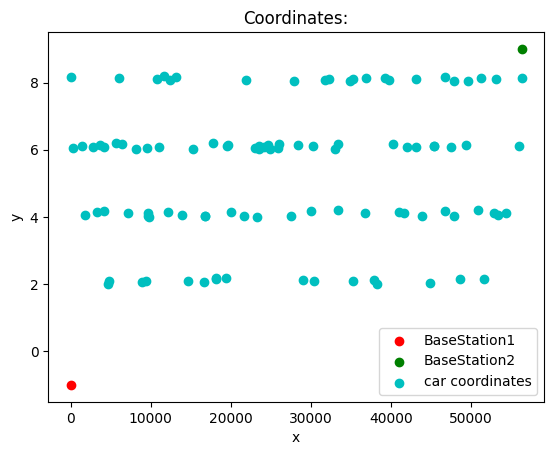

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=-1,y=-1, label = 'BaseStation1', color='r')
plt.scatter(x=56325,y=9,label='BaseStation2',color='g')
plt.scatter(x=cC.x_cord, y=cC.y_cord, label='car coordinates',color='c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coordinates:')
plt.legend()
plt.show()

# PROBLEM DEFINITION

In addressing this optimization challenge, two key metrics must be considered: the end-to-end transmission rate and the end-to-end latency. The latency signifies the delay between each link, set at 50 milliseconds (ms) according to the problem statement. Consequently, the end-to-end latency is the cumulative sum of all delays along the path. The end-to-end transmission rate is defined as the minimum value among the transmission rates of the links in the path. Specifically, in a path consisting of 5 links with transmission rates of 10 Mbps, 8 Mbps, 6 Mbps, 10 Mbps, and 6 Mbps, the end-to-end transmission rate is determined to be 6 Mbps. To calculate transmission rates for each link, distances between each car and between the cars and the two base stations are determined using the provided formula:

Distance = √((x2 – x1)^2 + (y2 – y1)^2)

where (x1,y1) and (x2,y2) are the coordinates of each node.

Subsequently, these distances are compared with the given table to ascertain the transmission rates for each link. It's noteworthy that links with distances exceeding 6000m results in a transmission rate of 0, and as such, they are excluded from the calculations for determining the optimal routing path. The outcome of these calculations yields a data file containing pairs of links, their respective distances, and corresponding transmission rates.

(Note:the data file has an additional column new_weights, which is the alternative value obtained after applying the Weighted Sum Pareto Optimization method. The explanation and code is provided later in the report.)


In [ ]:
uploaded = files.upload()

Saving maindataforallALGOs.csv to maindataforallALGOs.csv


In [ ]:
df = pd.read_csv('/content/maindataforallALGOs.csv')
df.head()

,Car,Pairs,Transmission Rate,Distance,new_weights
0,Car-1,Car-1 -> Car-2,6,1400.126378,0.000597
1,Car-1,Car-1 -> Car-3,2,3300.807623,0.000545
2,Car-1,Car-1 -> Car-4,2,3701.634554,0.000540
3,Car-1,Car-1 -> Car-5,1,4102.583771,0.000537
4,Car-1,Car-1 -> Car-6,1,4202.802821,0.000536


# CONTEXT

Optimizing Vehicular Network Routing: It focuses on enhancing routing strategies in vehicular networks, considering the integration of wireless capabilities into vehicles on motorways.

Calculation Process: A meticulous process calculates transmission rates for each link based on distances between vehicles and base stations, excluding links beyond 6000 meters.

Data File for Decision-Making: The aims is to generate a data file containing paired links, distances, and transmission rates, providing valuable insights for informed decision-making in vehicular network optimization.

# AIMS AND OBJECTIVES

Objective of Optimization Problem:
Twin-objective optimization problem: Maximize end-to-end transmission rate and minimize end-to-end latency.
Routing path determined for each car as the start node to either of the 2 basestations as the target.

Algorithmic Approaches:
1.	Dijkstra's Algorithm:
Utilizes a greedy approach for optimal performance in determining the shortest path within a graph.
2.	Ant Colony Algorithm:
Inspired by natural world principles.Exhibits exploration and flexibility for adapting to changing circumstances.
3.	Genetic Algorithm:
Nature-inspired optimization algorithm based on the process of natural selection.Utilizes genetic operators like crossover and mutation for evolving potential solutions.
4.	Bellman-Ford Technique:
Addresses networks with negative edge weights.Offers a method for handling various graph properties.

Algorithmic Perspectives:

* Dijkstra's Algorithm: Greedy approach.
* Ant Colony and Genetic Algorithms: Nature-inspired, providing unique perspectives and flexibility.
* Bellman-Ford Technique:
Handles networks with negative edge weights, showcasing versatility.
Research Focus:

Comparative analysis between nature-inspired algorithms (Ant Colony and Genetic Algorithms) and traditional methods (Dijkstra's Algorithm, Bellman-Ford Technique).


# GENETIC ALGORITHM (GA)

Genetic Algorithm

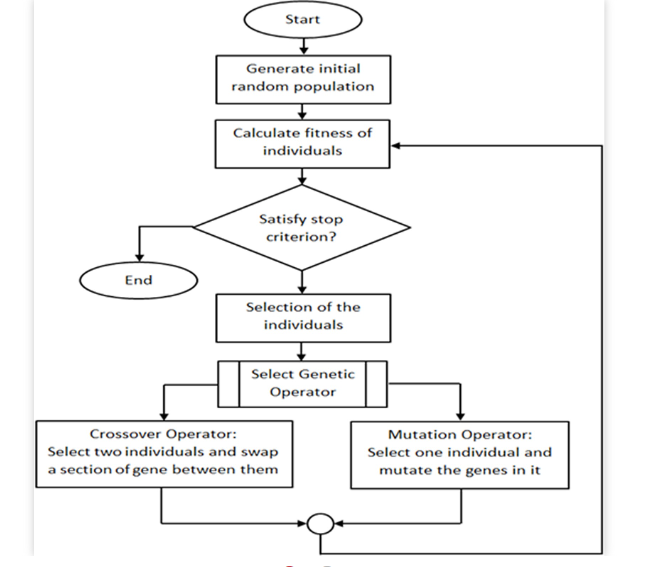
```
[[2]](https://plos.figshare.com/articles/figure/_Flow_Chart_of_Genetic_Algorithm_with_all_steps_involved_from_beginning_until_termination_conditions_met_6_/1418786/1 [Accessed 27 Nov 2023])



It is frequently utilised to generate outstanding solutions for search and optimisation challenges. Genetics and natural selection are the foundations of GA. The majority of evolutionary algorithms consist of adaptive heuristic searching methods. Genetic algorithms are a simulation of how nature selects the features that will help it survive. Consider a team of people tasked with a challenge, such as determining the optimal path on a map. Every individual stands for a distinct approach to solving it. The best answers, or the ones with the most desirable qualities, are selected at the end of each round to produce the following generation. Generation after generation goes through this process until a superb solution is discovered. Like in nature, where the fittest species survive and pass on their strengths to the next generation, it's similar to a problem-solving game where the finest strategies are always being passed down.
[[3]](https://www.geeksforgeeks.org/genetic-algorithms/?ref=header_search)
[[4]](https://medium.com/datasciencearth/genetic-algorithm-1-e52073005529)
[[5]](https://)Lecture and Lab


**Testing and Validation of Fitness score : The optimal routes are choosen for those with minimum fitness value**.






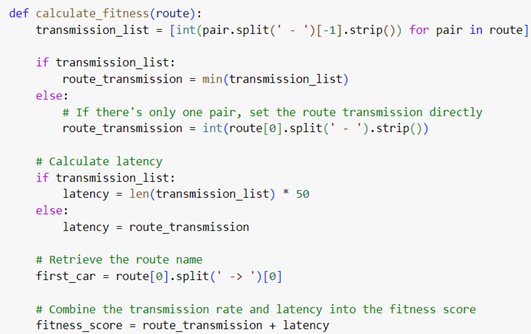



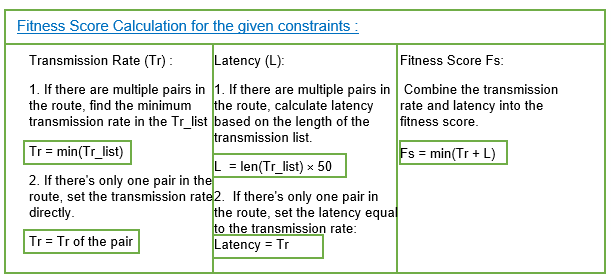

**The below code makes sure 3 scanerios for updating final routes:**
* If there is routes repeated with same fitness value choose anyone
* If there are more than 3 routes repeated for same car choose the least valued fitness score route.
* Make sure the routes are not repeated.

**Sample output from find common pairs and crossover**

* Common Pairs: [('Car-85 -> Car-91 - 1')]
* parent1_route = ['Car-85 -> Car-91 - 1', 'Car-91 -> Car-96 - 1', 'Car-96 -> Car-100 - 2', 'Car-100 -> BS-2 - 10']
* parent2_route = ['Car-42 -> Car-83 - 4', 'Car-83 -> Car-85 - 4', 'Car-85 -> Car-91 - 1', 'Car-91 -> Car-95 - 1', 'Car-95 -> Car-98 - 6', 'Car-98 -> Car-100 - 4', 'Car-100 -> BS-2 - 10']
* Child 1 Route: ['Car-85 -> Car-91 - 1', 'Car-91 -> Car-96 - 1', 'Car-100 - 2 -> Car-91 - 1', 'BS-2 - 10 -> Car-95 - 1']
* Child 2 Route: ['Car-42 -> Car-83 - 4', 'Car-83 -> Car-85 - 4', '-Car-91 - 1 -> Car-100 - 2', '-Car-95 - 1 -> BS-2 - 10']

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import time
tr_car_pairs_data = pd.read_csv('/content/maindataforallALGOs.csv')

car_coordinates_data = pd.read_csv('/content/data_file.csv')

# Base station coordinates
bs1_location = np.array([-1, -1])
bs2_location = np.array([56325, 9])

def generate_route(data, start_point, end_points, max_length=13):
    route = []
    current_point = start_point
    length = 0

    while length < max_length:
        # Filter rows where the current point is the starting point
        possible_pairs = data[data['Pairs'].str.startswith(current_point + " ->")]

        if possible_pairs.empty:
            break  # Route cannot continue

        # Choose a random row from the possible pairs
        selected_row = possible_pairs.sample()

        # Extract information from the selected row
        selected_pair = selected_row['Pairs'].values[0]
        transmission_rate = selected_row['Transmission Rate'].values[0]

        # Append the selected pair to the route
        route.append(f"{selected_pair} - {transmission_rate}")

        # Update the current point to the destination of the selected pair
        current_point = selected_pair.split(' -> ')[-1]

        length += 1

        # Check if the current point is in the specified end points
        if current_point in end_points:
            break

    return route

# Function to initialize a population of routes for Genetic Algorithm
def initialize_population_ga(data, end_points, population_size=2000, max_length=13):
    population = []

    for _ in range(population_size):
        start_point = f"Car-{random.randint(1, 100)}"
        route = generate_route(data, start_point, end_points, max_length)
        while not route or not any(end_point in route[-1] for end_point in end_points):
            # Ensure that the generated route reaches one of the specified end points
            start_point = f"Car-{random.randint(1, 100)}"
            route = generate_route(data, start_point, end_points, max_length)
        population.append(route)

    return population

# Define the end points
end_points = ["Car-1 -> BS-1", "Car-2 -> BS-1", "Car-3 -> BS-1", "Car-4 -> BS-1",
              "Car-5 -> BS-1", "Car-6 -> BS-1", "Car-7 -> BS-1", "Car-8 -> BS-1",
              "Car-51 -> BS-1", "Car-52 -> BS-1", "Car-53 -> BS-1", "Car-54 -> BS-1",
              "Car-50 -> BS-2", "Car-93 -> BS-2", "Car-94 -> BS-2", "Car-95 -> BS-2",
              "Car-96 -> BS-2", "Car-97 -> BS-2", "Car-98 -> BS-2", "Car-99 -> BS-2", "Car-100 -> BS-2"]

# Initialize the population
initial_population = initialize_population_ga(tr_car_pairs_data, end_points, population_size=10000, max_length=15)

# Print the generated routes
for i, route_i in enumerate(initial_population):
    first_car = route_i[0].split(' -> ')[0]
   # print(f"Route[{first_car}]: {route_i}")

fitness_scores = []

def calculate_fitness(route):
    transmission_list = [int(pair.split(' - ')[-1].strip()) for pair in route]

    if transmission_list:
        route_transmission = min(transmission_list)
    else:
        # If there's only one pair, set the route transmission directly
        route_transmission = int(route[0].split(' - ').strip())

    # Calculate latency
    if transmission_list:
        latency = len(transmission_list) * 50
    else:
        latency = route_transmission

    # Retrieve the route name
    first_car = route[0].split(' -> ')[0]

    # Combine the transmission rate and latency into the fitness score
    fitness_score = route_transmission + latency

    # Print for debugging
    # print(f"Transmission rates for Route-{first_car}: {transmission_list}")
    # print(f"Transmission rate for Route-{first_car}: {route_transmission}")
    # print(f"Latency for Route-{first_car}: {latency}")
    # print(f"Fitness Score for Route-{first_car}: {fitness_score}")
    # print(f" Route-{first_car}: {route}")

    return f"Car-{first_car.split('-')[1]}", fitness_score


def find_common_pairs(route1, route2):
    #print("commanpair", route1, route2)
    pairs_route1 = set(tuple(pair.split(' -> ')) for pair in route1)
    pairs_route2 = set(tuple(pair.split(' -> ')) for pair in route2)
    common_pairs = list(pairs_route1.intersection(pairs_route2))
    #print("return com", common_pairs)
    return common_pairs

def crossover(parent1, parent2, common_pair):
    child1 = copy.deepcopy(parent1)
    child2 = copy.deepcopy(parent2)

    idx_common1 = [i for i, pair in enumerate(child1) if common_pair == tuple(pair.split(' -> '))]
    idx_common2 = [i for i, pair in enumerate(child2) if common_pair == tuple(pair.split(' -> '))]

    if idx_common1 and idx_common2:
        idx_common1 = idx_common1[0]
        idx_common2 = idx_common2[0]

        first_car_common1 = child1[0].split(' -> ')[0]
        first_car_common2 = child2[0].split(' -> ')[0]

        child1[0] = child1[0].replace(first_car_common1, first_car_common2)
        child2[0] = child2[0].replace(first_car_common2, first_car_common1)

        child1[idx_common1:], child2[idx_common2:] = child2[idx_common2:], child1[idx_common1:]

    return child1, child2



def mutate(route, mutation_probability, tr_car_pairs_data):
    # Check mutation probability
    #print("route", route)
    if random.randrange(0,1) < 0.5:
        # Check if the route has more than 9 pairs

        if len(route) > 9:
            # Randomly select the index of the route to mutate
            index_to_mutate = random.randint(0, len(route) - 1)


            # Extract the cars from the selected pair

            car1_to_delete = route[index_to_mutate].split(' -> ')[0]

            car2_to_delete = route[index_to_mutate].split(' -> ')[1].split(' - ')[0]

            #Car-39 -> Car-40 - 6

            # Delete the selected pair from the route
            del route[index_to_mutate]

            # Update the car-id in the remaining pairs
            for i in range(len(route)):
                route[i] = route[i].replace(car1_to_delete, car2_to_delete)

            # Check if the mutated route is valid by updating transmission rates
            for i in range(1, len(route)):
                car1, car2 = route[i].split(' -> ')[0], route[i].split(' -> ')[1].split(' - ')[0]
                new_pair = f"{car1} -> {car2}"
                if new_pair in tr_car_pairs_data['Pairs'].values:
                    transmission_rate = tr_car_pairs_data.loc[tr_car_pairs_data['Pairs'] == new_pair, 'Transmission Rate'].values[0]
                    route[i] = f"{new_pair} - {transmission_rate}"
                else:
                    # If the new pair is not valid, revert the mutation
                    return route

    return route

def crossover_and_mutate(population, sorted_routes, tr_car_pairs_data):
    # Placeholder logic for crossover and mutation
    new_population = []

    # Perform crossover and mutation for each pair of parents
    for i in range(0, len(population), 2):
        parent1 = population[i]
        #print("parent1", parent1)
        parent2 = population[i + 1]
        #print("parent2", parent2)

        # Perform crossover using your predefined function
        common_pair = find_common_pairs(parent1, parent2)
        child1, child2 = crossover(parent1, parent2, common_pair)

        #print(child1, child2)

        # Perform mutation using your predefined function
        mutation_probability = 0.2  # Adjust the mutation probability as needed
        #print("child1", child1)
        #print("child2", child2)

        child1 = mutate(child1, mutation_probability, tr_car_pairs_data)
        child2 = mutate(child2, mutation_probability, tr_car_pairs_data)

        # Add children to the new population
        new_population.append((child1, 0, 0))
        new_population.append((child2, 0, 0))

    return new_population


In [ ]:
import json
import os

# Function to save routes to JSON file for a given generation
def save_generation_to_json(generation, routes):
    filename = f"gen_{generation}.json"
    with open(filename, 'w') as json_file:
        json.dump([{'Car': car_id, 'Path': route, 'Score': score} for car_id, (route, score) in routes.items()], json_file, indent=4)
    # print(f"Generation {generation} routes saved to {filename}")

# Function to consolidate routes between two generations for common car IDs
def consolidate_routes(gen_x_routes, gen_y_routes):
    consolidated_routes = gen_y_routes.copy()

    for car_id, (route_x, score_x) in gen_x_routes.items():
        if car_id in consolidated_routes:
            consolidated_routes[car_id] = (route_x, score_x)

    return consolidated_routes


# Function to read routes from JSON file
def read_routes_from_json(filename):
    with open(filename, 'r') as json_file:
        data = json.load(json_file)
        routes = {item['Car']: (item['Path'], item['Score']) for item in data}
    return routes

# initial_population = crossover_and_mutate(initial_population)
num_generations = 50

def GAloop(initial_population, num_generations):
    optimal_routes = {f"Car-{i}": (None, float('inf')) for i in range(1, 101)}
    sorted_routes = None
    all_optimal_paths = []  # Moved outside the loop

    # Record the start time

    for generation in range(num_generations):
        # print(f"\nGeneration {generation + 1}")

        # Calculate fitness scores for each route in the initial population
        fitness_scores = []
        for route in initial_population:
            car_id, fitness_score = calculate_fitness(route)
            fitness_scores.append((car_id, fitness_score))

            # Update optimal routes during generations if a better route is found
            if generation < 25 and fitness_score < 151:
                optimal_routes[car_id] = (route, fitness_score)
            elif generation >= 25  and fitness_score < 481:
                optimal_routes[car_id] = (route, fitness_score)

        # Display the optimal routes for each generation
        # print("\nOptimal Routes:")
        current_generation_optimal_paths = []
        for car_id, (route, score) in optimal_routes.items():
            if route is not None:
                print(f"{car_id}, {score}: {route}")
                current_generation_optimal_paths.append({
                    "Car": car_id,
                    "Path": route,
                    "Score": score
                })

        # Append the current generation's optimal routes to the list
        all_optimal_paths.append(current_generation_optimal_paths)

        # Apply crossover on the new generation
        new_population = crossover_and_mutate(initial_population, sorted_routes, tr_car_pairs_data)

        # Print the new parents after crossover
        # print("\nNew Parents after Crossover:")
        for i, (parent1, parent2) in enumerate(zip(initial_population, initial_population[1:])):
            if i % 2 == 0:
                print()

        # Update the current generation's sorted routes
        sorted_routes = sorted(new_population, key=lambda x: x[1])

        # Update the initial population with the new generation
        initial_population = new_population

        # Apply mutation on the new generation
        initial_population = [mutate(route, 0.2, tr_car_pairs_data) for route, _, _ in initial_population]

        # Update optimal routes during generations if a better route is found
        for car_id, (current_route, current_score) in optimal_routes.items():
            if current_route is not None:
                current_fitness_score = calculate_fitness(current_route)[1]
                if current_fitness_score > fitness_score:
                    optimal_routes[car_id] = (route, fitness_score)
        # Save routes for each generation (moved outside the loop)
        for current_generation, optimal_routes_gen in enumerate(all_optimal_paths, start=1):
            save_generation_to_json(current_generation, {item['Car']: (item['Path'], item['Score']) for item in optimal_routes_gen})

    return optimal_routes

start_time_GA = time.time()

# Call the GAloop function and get the optimal routes for all generations
fin_optimal_routes = GAloop(initial_population, num_generations)

# Record the end time
end_time_GA = time.time()


# Consolidate routes between gen_x and gen_y (modify as needed)
gen_x_filename = 'gen_25.json'  # Replace with the desired generation
gen_y_filename = 'gen_50.json'  # Replace with the desired generation
gen_x_routes = read_routes_from_json(gen_x_filename)
gen_y_routes = read_routes_from_json(gen_y_filename)
consolidated_routes = consolidate_routes(gen_x_routes, gen_y_routes)


# Calculate and print the total time taken
total_time_GA = end_time_GA - start_time_GA
print(f"Total Time: {total_time_GA} seconds")

# Save the consolidated routes as final_route.json
final_filename = 'final_route.json'
with open(final_filename, 'w') as json_file:
    # Limit the iteration to the first 100 cars
    json.dump(
        [{'Car': car_id, 'Path': route, 'Score': score}
         for idx, (car_id, (route, score)) in enumerate(consolidated_routes.items()) if idx < 100],
        json_file, indent=4
    )

print(f"Consolidated routes between {gen_x_filename} and {gen_y_filename} saved to {final_filename}")

final_routes = read_routes_from_json(final_filename)

# Print or use the final routes
for car_id, (route, score) in final_routes.items():
    print(f"{car_id}, {score}: {route}")



Streaming output truncated to the last 5000 lines.























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































Route [Car-35]: ['Car-35 -> Car-80 - 4', 'Car-80 -> Car-82 - 4', 'Car-82 -> Car-84 - 4', 'Car-84 -> Car-88 - 1', 'Car-88 -> Car-93 - 1', 'Car-93 -> Car-95 - 6', 'Car-95 -> Car-97 - 10', 'Car-97 -> Car-98 - 6', 'Car-98 -> Car-100 - 4', 'Car-100 -> BS-2 - 10']


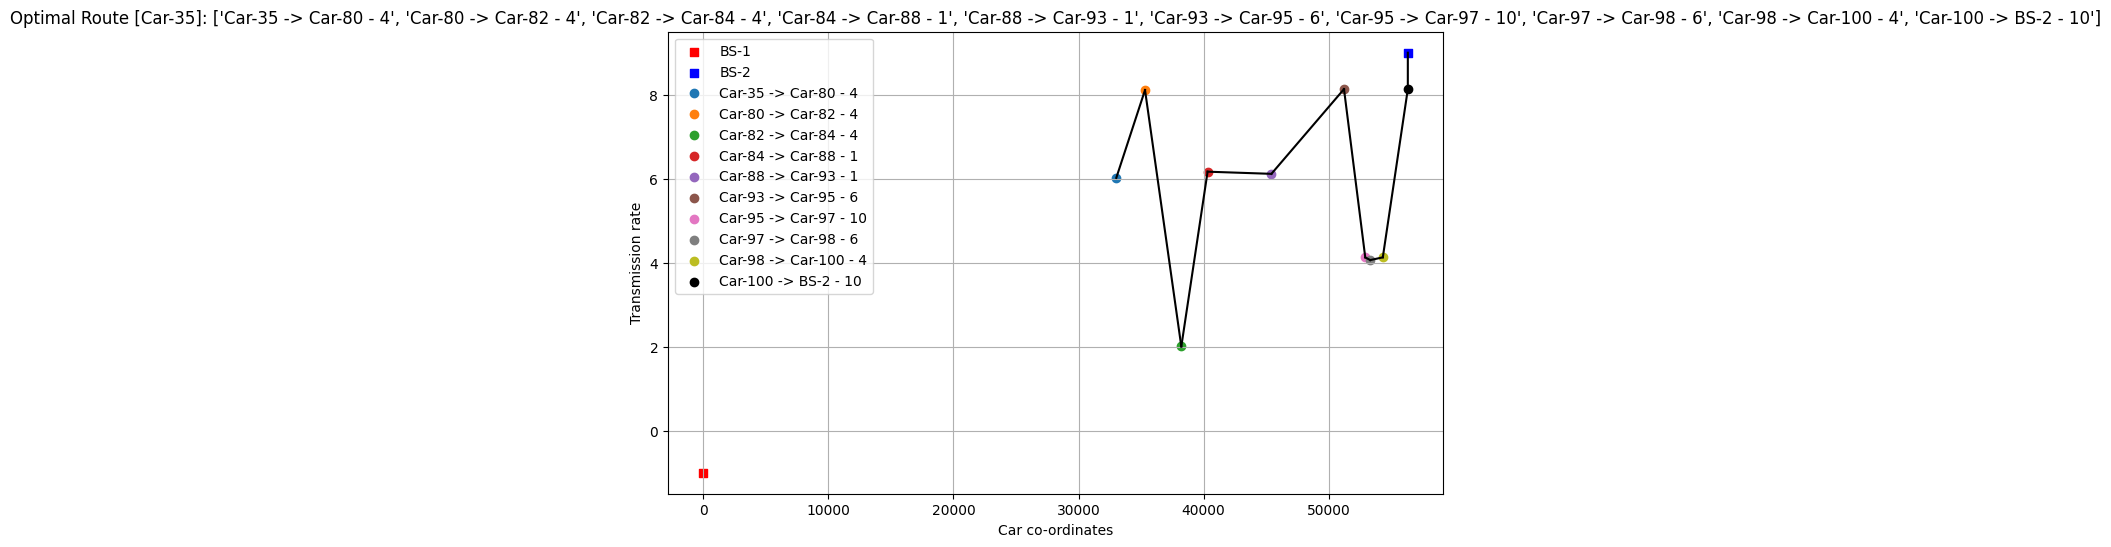

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import json

# Load files for visual
tr_car_pairs_data = pd.read_csv('/content/maindataforallALGOs.csv')

car_coordinates_data = pd.read_csv('/content/data_file.csv')

# Base station coordinates
bs1_location = np.array([-1, -1])
bs2_location = np.array([56325, 9])

# Load routes from the JSON file
with open('/content/final_route.json', 'r') as json_file:
    final_routes_data = json.load(json_file)

# Process the loaded data
final_route_data = {}
for item in final_routes_data:
    key, value = list(item.items())[0]
    final_route_data[key] = value

def generate_route(data, start_point, end_points, max_length=10):
    route = []
    current_point = start_point
    length = 0

    while length < max_length:
        # Filter rows where the current point is the starting point
        possible_pairs = data[data['Pairs'].str.startswith(current_point + " ->")]

        if possible_pairs.empty:
            break  # Route cannot continue

        # Choose a random row from the possible pairs
        selected_row = possible_pairs.sample()

        # Extract information from the selected row
        selected_pair = selected_row['Pairs'].values[0]
        transmission_rate = selected_row['Transmission Rate'].values[0]

        # Append the selected pair to the route
        route.append(f"{selected_pair} - {transmission_rate}")

        # Update the current point to the destination of the selected pair
        current_point = selected_pair.split(' -> ')[-1]

        length += 1

        # Check if the current point is in the specified end points
        if current_point in end_points:
            break

    return route

def plot_route(route, car_coordinates, bs1_location, bs2_location):
    # Initialize the plot
    plt.figure(figsize=(10, 6))

    # Plot base stations
    plt.scatter(bs1_location[0], bs1_location[1], color='red', marker='s', label='BS-1')
    plt.scatter(bs2_location[0], bs2_location[1], color='blue', marker='s', label='BS-2')

    # Plot cars and connect them with lines
    for i in range(len(route)-1):
        # Extract car from the pair
        car = route[i].split(' -> ')[0]

        # If the point is a base station, use its coordinates
        if car.startswith('BS'):
            x, y = bs1_location if 'BS-1' in car else bs2_location
        else:
            # If the point is a car, use its coordinates
            x = car_coordinates[car_coordinates['Vehicle'] == int(car.split('-')[-1])]['x_cord'].values[0]
            y = car_coordinates[car_coordinates['Vehicle'] == int(car.split('-')[-1])]['y_cord'].values[0]

        plt.scatter(x, y, label=route[i])

        # Connect consecutive points with lines
        next_car = route[i+1].split(' -> ')[0]
        next_x = bs1_location[0] if 'BS-1' in next_car else bs2_location[0] if 'BS-2' in next_car else car_coordinates[car_coordinates['Vehicle'] == int(next_car.split('-')[-1])]['x_cord'].values[0]
        next_y = bs1_location[1] if 'BS-1' in next_car else bs2_location[1] if 'BS-2' in next_car else car_coordinates[car_coordinates['Vehicle'] == int(next_car.split('-')[-1])]['y_cord'].values[0]

        plt.plot([x, next_x], [y, next_y], 'k-')

    # Add a marker for the last car to BS-1 or BS-2
    last_car = route[-1].split(' -> ')[0]
    last_x = bs1_location[0] if 'BS-1' in last_car else bs2_location[0] if 'BS-2' in last_car else car_coordinates[car_coordinates['Vehicle'] == int(last_car.split('-')[-1])]['x_cord'].values[0]
    last_y = bs1_location[1] if 'BS-1' in last_car else bs2_location[1] if 'BS-2' in last_car else car_coordinates[car_coordinates['Vehicle'] == int(last_car.split('-')[-1])]['y_cord'].values[0]

    plt.scatter(last_x, last_y, marker='o', color='black', label=route[-1])
    plt.plot([last_x, bs1_location[0] if 'BS-1' in route[-1] else bs2_location[0]], [last_y, bs1_location[1] if 'BS-1' in route[-1] else bs2_location[1]], 'k-')

    # Add labels and legend
    plt.xlabel('Car co-ordinates')
    plt.ylabel('Transmission rate')
    plt.title(f'Optimal Route [{route[0].split(" -> ")[0]}]: {route}')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Generate a random start point between "Car-1" to "Car-100"
start_point = f"Car-{random.randint(1, 100)}"

# Define the end points
end_points = ["Car-1 -> BS-1", "Car-2 -> BS-1", "Car-3 -> BS-1", "Car-4 -> BS-1",
              "Car-5 -> BS-1", "Car-6 -> BS-1", "Car-7 -> BS-1", "Car-8 -> BS-1",
              "Car-51 -> BS-1", "Car-52 -> BS-1", "Car-53 -> BS-1", "Car-54 -> BS-1",
              "Car-50 -> BS-2", "Car-93 -> BS-2", "Car-94 -> BS-2", "Car-95 -> BS-2",
              "Car-96 -> BS-2", "Car-97 -> BS-2", "Car-98 -> BS-2", "Car-99 -> BS-2", "Car-100 -> BS-2"]

# Generate a random route with a maximum length of 10
# car_id_to_gen = "Car-88"
random_route = generate_route(tr_car_pairs_data, start_point, end_points, max_length=15)

# Print the generated route
print(f"Route [{start_point}]: {random_route}")

# Plot the route using car coordinates and base station coordinates
plot_route(random_route, car_coordinates_data, bs1_location, bs2_location)


# ANT COLONY OPTIMISATION ALGORITHM (ACOA)

Ant colony optimization is used to identify an optimized path with a maximum transmission rate and minimum latency. This algorithm emulates the behaviour of ants in search of food. Ants navigate a graph, leaving pheromones on its edges as they explore. Other ants utilize these pheromone trails to discover efficient routes. Edges with higher pheromone concentrations attract more ants, influencing them to select the path and ultimately aiding in the discovery of an optimized route.
[[6]](https://www.geeksforgeeks.org/introduction-to-ant-colony-optimization/)[[7]](https://ieeexplore.ieee.org/document/4129846)

**Stepa in Ant Colony Optimisation Algorithm**

1. *Read the data*: Begin by reading the dataset, which contains the coordinates of 100 cars and base stations, as well as the equation for determining the distance between them. Calculate the transmission rate based on the distance between car links.

2. *Initialisation*:
i. Identify the set of cars and base stations.
ii.Create a graph where nodes represent cars and base stations and edges are determined by the transmission rate between them.
iii. Initialize pheromone levels on all edges of the graph to a constant value.
3. *Define Parameters*:
i. Alpha: Represents the importance of pheromone information. A higher value makes ants more likely to choose a path with a high pheromone level.
ii. Beta: Represents the importance of heuristic information or the transmission rate. Higher values give more weight to a low transmission rate when selecting a path or the next node.
iii. Rho: Represents the pheromone evaporation rate. A lower value means slower evaporation, resulting in paths remaining on the graph for a longer time.
iv. Q: Represents the total amount of pheromone that an ant deposits on an edge when it successfully traverses that edge. A higher value of Q means more ants deposit pheromone on the path.
4. *Iteration over graph or Ant Movement*:
For a specified number of iterations, each ant in the colony iterates to find a path to each base station. The probability of each neighbour is calculated based on the transmission rate and pheromone level. To avoid duplication, neighbours are filtered based on whether each neighbour exists at the pheromone level, whether it's a path to the corresponding base stations, and whether it's already iterated over. A stochastic decision rule is used to select a node, and ants move to the next node, updating the path.
5. *Evaluation*: Use the defined function to evaluate the transmission rate and latency of each path during each iteration.
6. *Update Pheromones*: Update based on the best paths found in the current iteration.
i. Evaporate existing pheromones based on the evaporation rate.
ii. Deposit pheromones on edges that were part of the paths taken by ants.
7. *Analysis*:
i. Analyse the paths taken by ants to find the best paths.
ii. Evaluate and compare the performance of different paths based on defined objectives (transmission rate, latency).
[[8]](https://www.baeldung.com/wp-content/uploads/2017/03/ants1.png)

**Constraints Used**


```
def evaluating_objectives(path, graph):
    transmission_rates = [graph[edge[0]][edge[1]]['weight'] for edge in zip(path, path[1:])]
    end_to_end_transmission_rate = min(transmission_rates)
    end_to_end_latency = len(path) * 50
    return end_to_end_transmission_rate, end_to_end_latency
```


In the evaluating_objectives function, end_to_end_transmission_rate and end_to_end_latency are calculated, where end-to-end_transmission_rate denotes the minimum transmission rate along the entire path from a car to a base station, and end-to-end_latency represents the total time for a message to traverse the complete path from a car to a base station. The calculation for end-to-end latency is expressed as (len(path)*50). These metrics, end-to-end transmission rate and end-to-end latency are critical performance indicators considered by the ACO algorithm when assessing and selecting paths.

```
path_metrics = [(path, *evaluating_objectives(path, G)) for path in ant_paths]
best_path_metrics = max(path_metrics, key=lambda metrics: (metrics[1], -metrics[2]))
best_path, transmission_rate, latency = best_path_metrics
```
where,
- the first element of the tuple, `metrics [1]`, represents the transmission rate of the path.
-the second element, `-metrics [2]`, represents the negation of the latency of the path.The negation is used because `max` finds the maximum value, but in this case, we want to minimize latency. So, by negating the latency, we effectively prioritize paths with lower latency.



In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import json
import time
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/maindataforallALGOs.csv')

#by using for loop, looping through "Pairs coloumn in Dataset and extract cars and basestation, then store in to list
cars = []
base_stations = []
for pair in df['Pairs']:
    elements = pair.split('->')
    car = elements[0].strip()
    if car not in cars:
        cars.append(car)
    if 'BS' in elements[1] and elements[1].strip() not in base_stations:
        base_stations.append(elements[1].strip())

#create a graph g, where nodes in the graph are cars and basestations, and edges are transmission links between them, transmission rate as weight are taken from the grapg
G = nx.Graph()
for index, row in df.iterrows():
    elements = row['Pairs'].split('->')
    car_from, car_to = elements[0].strip(), elements[1].strip()
    G.add_edge(car_from, car_to, weight=row['Transmission Rate'])

#initialize pheromone levels for edges
pheromone_levels = {(car_from, car_to): 1.0 for car_from in cars for car_to in G.neighbors(car_from)}

# initialize ACO parameters
alpha = 1  # importance of pheromone information in the decision making process
beta = 2   # importance of heuristic information/transmission rate
rho = 0.1  # pheromone evaporation rate
Q = 1      # total amount of pheromone

num_ants = 10
num_iterations = 10

best_paths_dict = {}
all_path = []

In [ ]:
#defined a function to calculate objective value to find path such as end-to-end transmission rate and end-to-end latency
def evaluating_objectives(path, graph):
    transmission_rates = [graph[edge[0]][edge[1]]['weight'] for edge in zip(path, path[1:])]
    end_to_end_transmission_rate = min(transmission_rates)
    end_to_end_latency = len(path) * 50
    return end_to_end_transmission_rate, end_to_end_latency




In [ ]:
# Separate paths for BS-1 and BS-2 for each car
paths_to_bs1 = {car: [] for car in cars}
paths_to_bs2 = {car: [] for car in cars}

#using ACO, iterate over each base stations to find best optimal path
for i in range(len(base_stations)):
    base_station = base_stations[i]
    start_time_ACO = time.time()

#iterate over given number of iterations and continue linking to next car until it reaches basestation from current given car.
    for car in cars:
        ant_paths = []  # To store paths generated by ants
        iteration_best_paths = []  # To store the best path to the base station for the current car

        # Iterate over a given number of iterations
        for iteration in range(num_iterations):
            for ant in range(num_ants):
                current_node = car
                path = [current_node]

                while current_node != base_station:
                    neighbors = list(G.neighbors(current_node))

                    if not neighbors:
                        break

                #Filter neighbours based on checking whether it exist on pheromone level defined link
                    valid_neighbors = [neighbor for neighbor in neighbors if (current_node, neighbor) in pheromone_levels]

                    if not valid_neighbors:
                        break

                #filter out neighbour that leading to other basestation other than current one
                    valid_neighbors = [neighbor for neighbor in valid_neighbors if neighbor != base_stations[1 - i] and (current_node, neighbor) in pheromone_levels]

                #filter out neighbour that already iterated over in path.
                    valid_neighbors = [neighbor for neighbor in valid_neighbors if neighbor not in path]

                    if not valid_neighbors:
                        break

                    # Calculate probability
                    pheromone_values = [pheromone_levels[(current_node, neighbor)] for neighbor in valid_neighbors]
                    transmission_rates = [G[current_node][neighbor]['weight'] for neighbor in valid_neighbors]
                    probabilities = [(pheromone**alpha) * ((1/transmission_rate)**beta) for pheromone, transmission_rate in zip(pheromone_values, transmission_rates)]
                    probabilities /= np.sum(probabilities)

                    # Calculate the next node
                    next_node = np.random.choice(valid_neighbors, p=probabilities)
                    path.append(next_node)
                    current_node = next_node

                ant_paths.append(path)

                # Evaluate transmission rate and latency for each path
                path_metrics = [(path, *evaluating_objectives(path, G)) for path in ant_paths]

                # Find the best path based on maximizing transmission rate and minimizing latency
                best_path_metrics = max(path_metrics, key=lambda metrics: (metrics[1], -metrics[2]))  # Maximizing transmission rate and minimizing latency
                best_path, transmission_rate, latency = best_path_metrics

                iteration_best_paths.append((iteration, best_path, transmission_rate, latency))

            # Update pheromone levels
            for edge in G.edges():
                pheromone_levels[edge] *= (1 - rho)  # Evaporation
                for path in ant_paths:
                    if edge in zip(path, path[1:]) and path[-1] == base_station:
                        pheromone_levels[edge] += Q  # Deposit pheromone

        end_time_ACO = time.time()

        # Extract information for visualization and analysis
        iterations, best_paths, transmission_rates, latencies = zip(*iteration_best_paths)


        # Separate paths for BS-1 and BS-2 for each car
        if base_station == 'BS-1':
            paths_to_bs1[car].append((car, best_path, transmission_rate, latency))
        elif base_station == 'BS-2':
            paths_to_bs2[car].append((car, best_path, transmission_rate, latency))




In [ ]:
# Function to calculate fitness score
def calculate_fitness(transmission_rate, latency):
    return transmission_rate +  latency

In [ ]:
fitness_scores = []
latency_values = []
transmission_rates = []


for car in cars:
    paths_bs1 = paths_to_bs1[car]
    paths_bs2 = paths_to_bs2[car]

    # Find the path with max transmission rate and min latency for each car
    optimal_path_bs1 = max(paths_bs1, key=lambda metrics: (metrics[2], -metrics[3]))  # Maximizing transmission rate and minimizing latency
    optimal_path_bs2 = max(paths_bs2, key=lambda metrics: (metrics[2], -metrics[3]))  # Maximizing transmission rate and minimizing latency

    # Compare paths and select the one with max transmission rate and min latency
    if optimal_path_bs1[2] > optimal_path_bs2[2] or (optimal_path_bs1[2] == optimal_path_bs2[2] and optimal_path_bs1[3] < optimal_path_bs2[3]):
        selected_path = optimal_path_bs1
        selected_base_station = 'BS-1'
    else:
        selected_path = optimal_path_bs2
        selected_base_station = 'BS-2'

    routing_paths = [f"{selected_path[1][i]}" for i in range(len(selected_path[1]))]

    source_node = selected_path[1][0]
    routing_path = [(selected_path[1][i], G[selected_path[1][i]][selected_path[1][i + 1]]['weight']) for i in range(len(selected_path[1]) - 1)]
    end_to_end_transmission_rate = selected_path[2]
    end_to_end_latency = len(selected_path[1]) * 50  # Adjust as needed
    latency_values.append(end_to_end_latency)
    transmission_rates.append(end_to_end_transmission_rate)


    # Calculate fitness score
    fitness_score = calculate_fitness(end_to_end_transmission_rate, end_to_end_latency)
    fitness_scores.append(fitness_score)

    output_dict_selected = {
        "Source node": source_node,
        "Routing path": ", ".join([f"({node}, {rate} Mbps)" for node, rate in routing_path[1:]] + [f"({selected_base_station}, {end_to_end_transmission_rate} Mbps)"]),
        "End-to-end transmission rate": f"{end_to_end_transmission_rate} Mbps",
        "End-to-end latency": f"{end_to_end_latency} ms",
        "Fitness Score": fitness_score
    }

    all_path.append(output_dict_selected)
    print(f"{car}:- {end_to_end_transmission_rate} Mbps, {end_to_end_latency} ms, Fitness: {fitness_score} {' -> '.join(routing_paths).ljust(30)} ")


Car-1:- 1 Mbps, 150 ms, Fitness: 151 Car-1 -> Car-6 -> BS-1         
Car-2:- 1 Mbps, 250 ms, Fitness: 251 Car-2 -> Car-55 -> Car-51 -> Car-54 -> BS-1 
Car-3:- 1 Mbps, 200 ms, Fitness: 201 Car-3 -> Car-10 -> Car-54 -> BS-1 
Car-4:- 2 Mbps, 100 ms, Fitness: 102 Car-4 -> BS-1                  
Car-5:- 1 Mbps, 100 ms, Fitness: 101 Car-5 -> BS-1                  
Car-6:- 1 Mbps, 100 ms, Fitness: 101 Car-6 -> BS-1                  
Car-7:- 1 Mbps, 100 ms, Fitness: 101 Car-7 -> BS-1                  
Car-8:- 1 Mbps, 100 ms, Fitness: 101 Car-8 -> BS-1                  
Car-9:- 1 Mbps, 150 ms, Fitness: 151 Car-9 -> Car-6 -> BS-1         
Car-10:- 1 Mbps, 150 ms, Fitness: 151 Car-10 -> Car-7 -> BS-1        
Car-11:- 1 Mbps, 150 ms, Fitness: 151 Car-11 -> Car-6 -> BS-1        
Car-12:- 1 Mbps, 150 ms, Fitness: 151 Car-12 -> Car-8 -> BS-1        
Car-13:- 1 Mbps, 150 ms, Fitness: 151 Car-13 -> Car-8 -> BS-1        
Car-14:- 1 Mbps, 150 ms, Fitness: 151 Car-14 -> Car-54 -> BS-1       
Car-15:- 1 Mb

In [ ]:
# Save all results as a JSON file
output_file_path = "all_path_aco.json"
with open(output_file_path, 'w') as json_file:
    json.dump(all_path, json_file)

print(f"All results saved to {output_file_path}")

All results saved to all_path_aco.json


In [ ]:
# Calculate elapsed time
total_time_ACO = end_time_ACO - start_time_ACO
print(f"Time taken for ACO: {total_time_ACO} seconds")

Time taken for ACO: 89.37636256217957 seconds


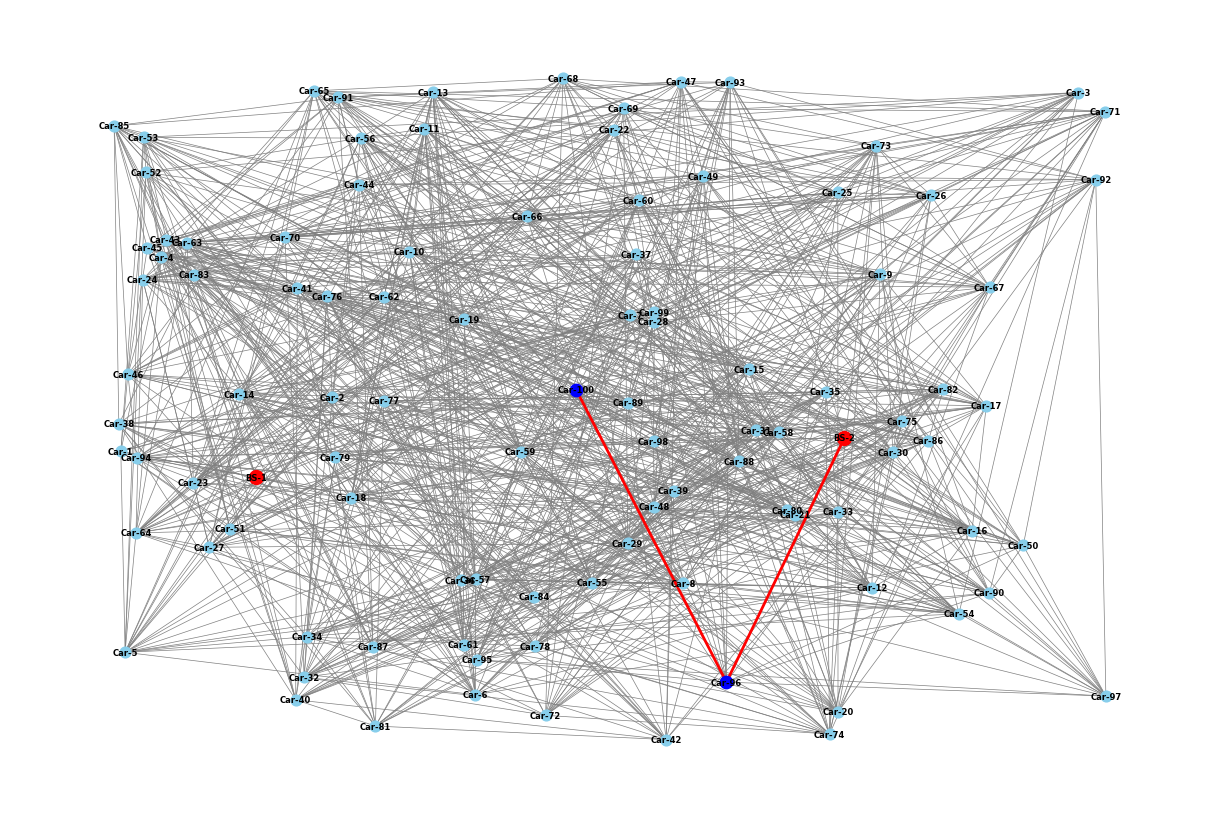

In [ ]:
plt.figure(figsize=(12, 8))
pos = nx.random_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray', width=0.5, node_size=60, font_size=6)
nx.draw_networkx_edges(G, pos, edgelist=[(selected_path[1][i], selected_path[1][i + 1]) for i in range(len(selected_path[1]) - 1)] , edge_color='red', width=2)
nx.draw_networkx_nodes(G, pos, nodelist=selected_path[1], node_color='blue', node_size=80)
nx.draw_networkx_nodes(G, pos, nodelist=base_stations, node_color='red', node_size=100)


plt.show()

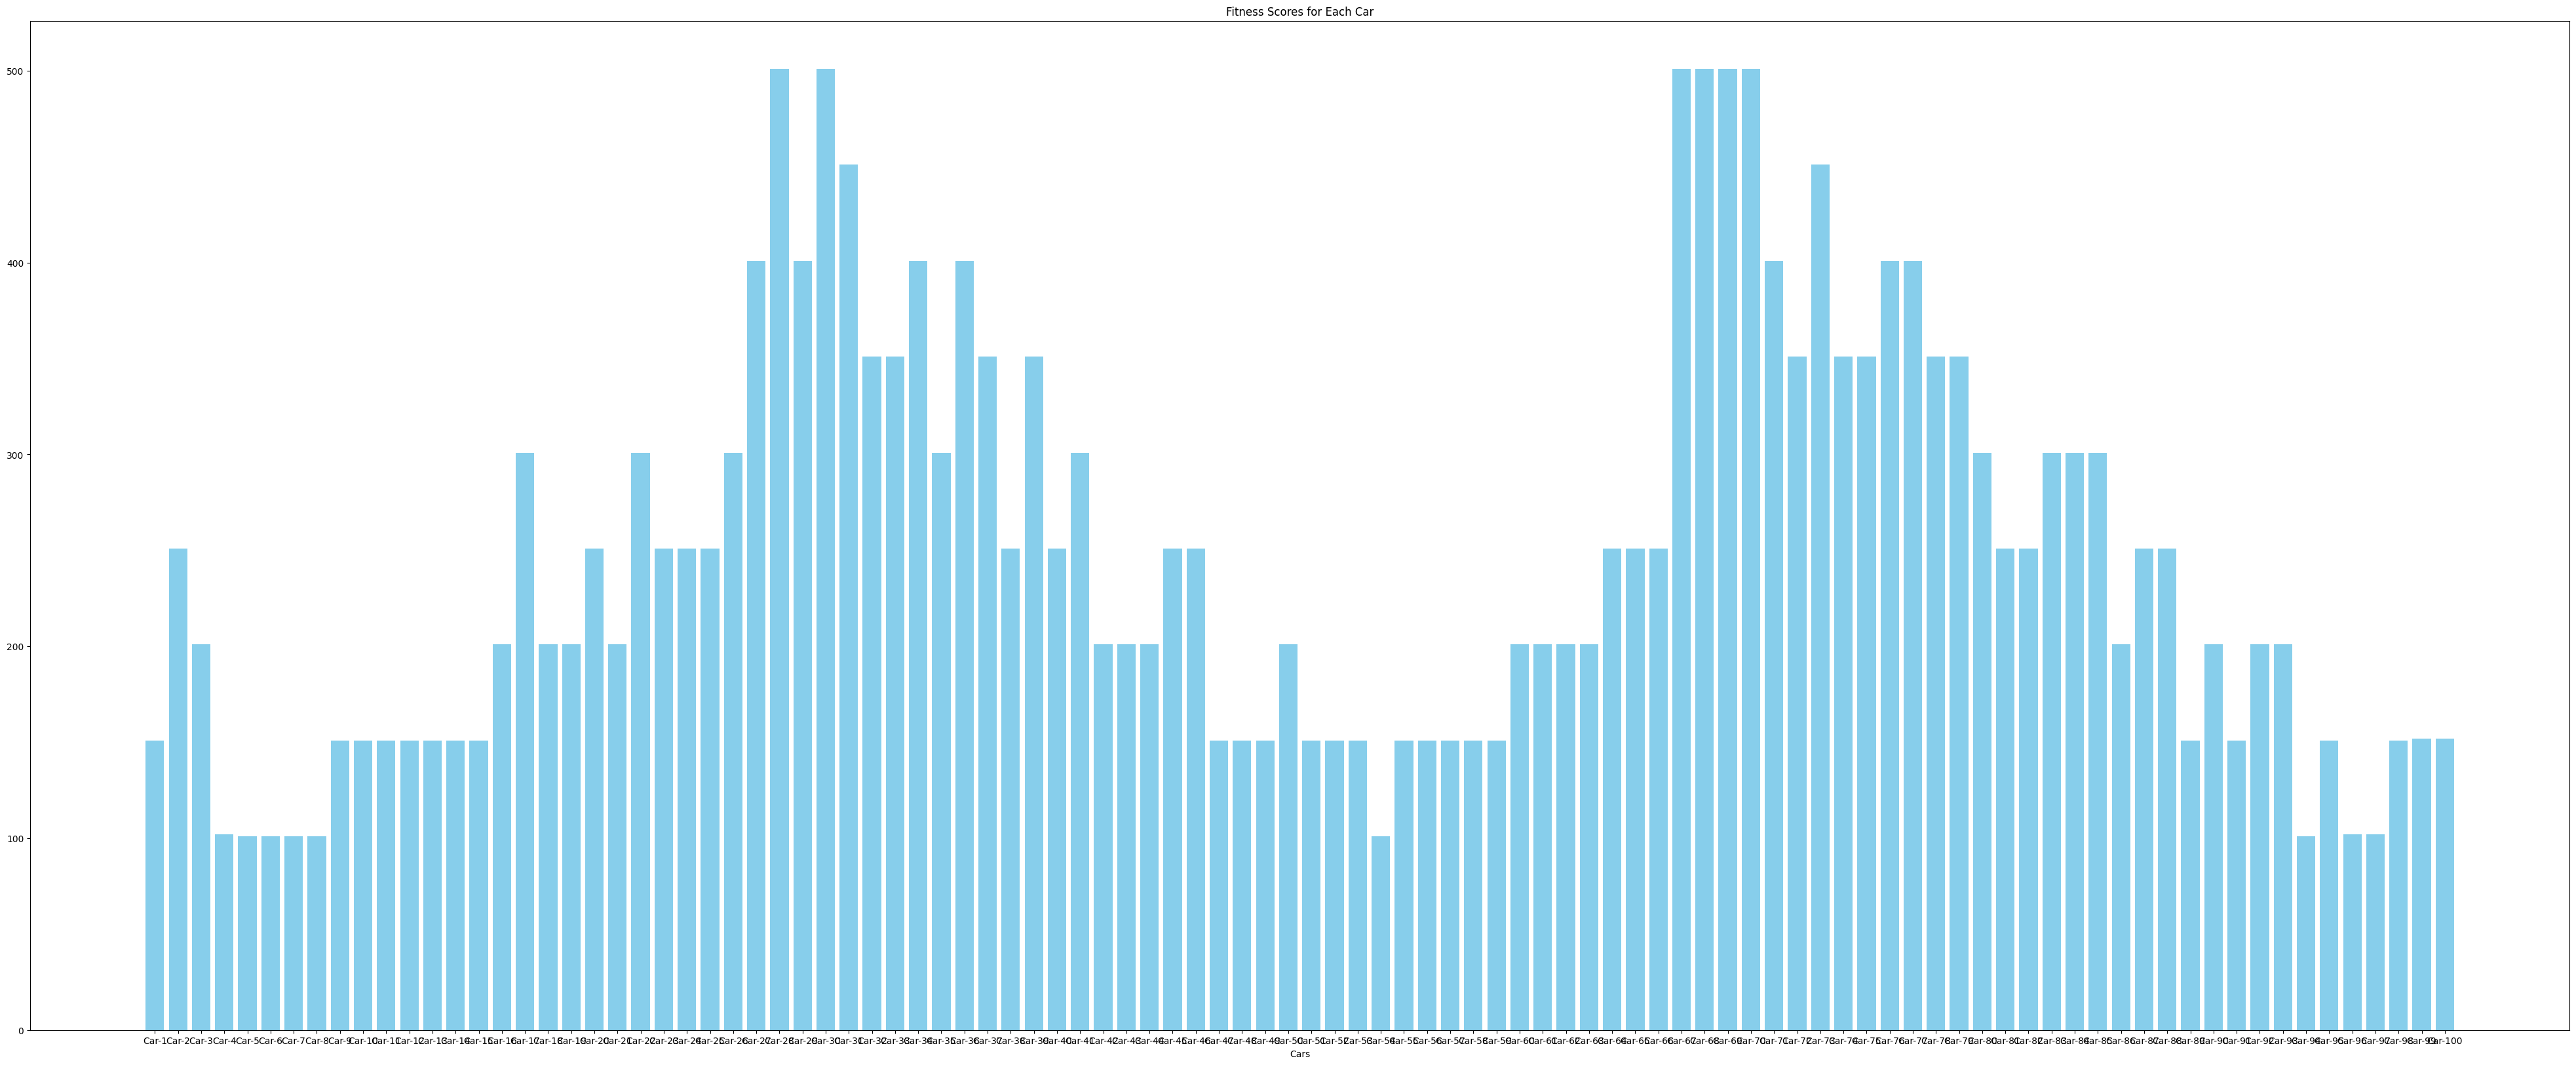

In [ ]:
#plotting fitness score of each car using bar
plt.figure(figsize=(50, 20))
plt.bar(cars, fitness_scores, color='skyblue')
plt.xlabel('Cars')
plt.title('Fitness Scores for Each Car')
plt.show()


For ACO, the calculated Fitness score considering 2 objectives such as Transmission rate and latency.

```
def calculate_fitness(transmission_rate, latency):
    return transmission_rate +  latency
```
Here, bar plot is used to illustrate the fitness score of each cars to base
station



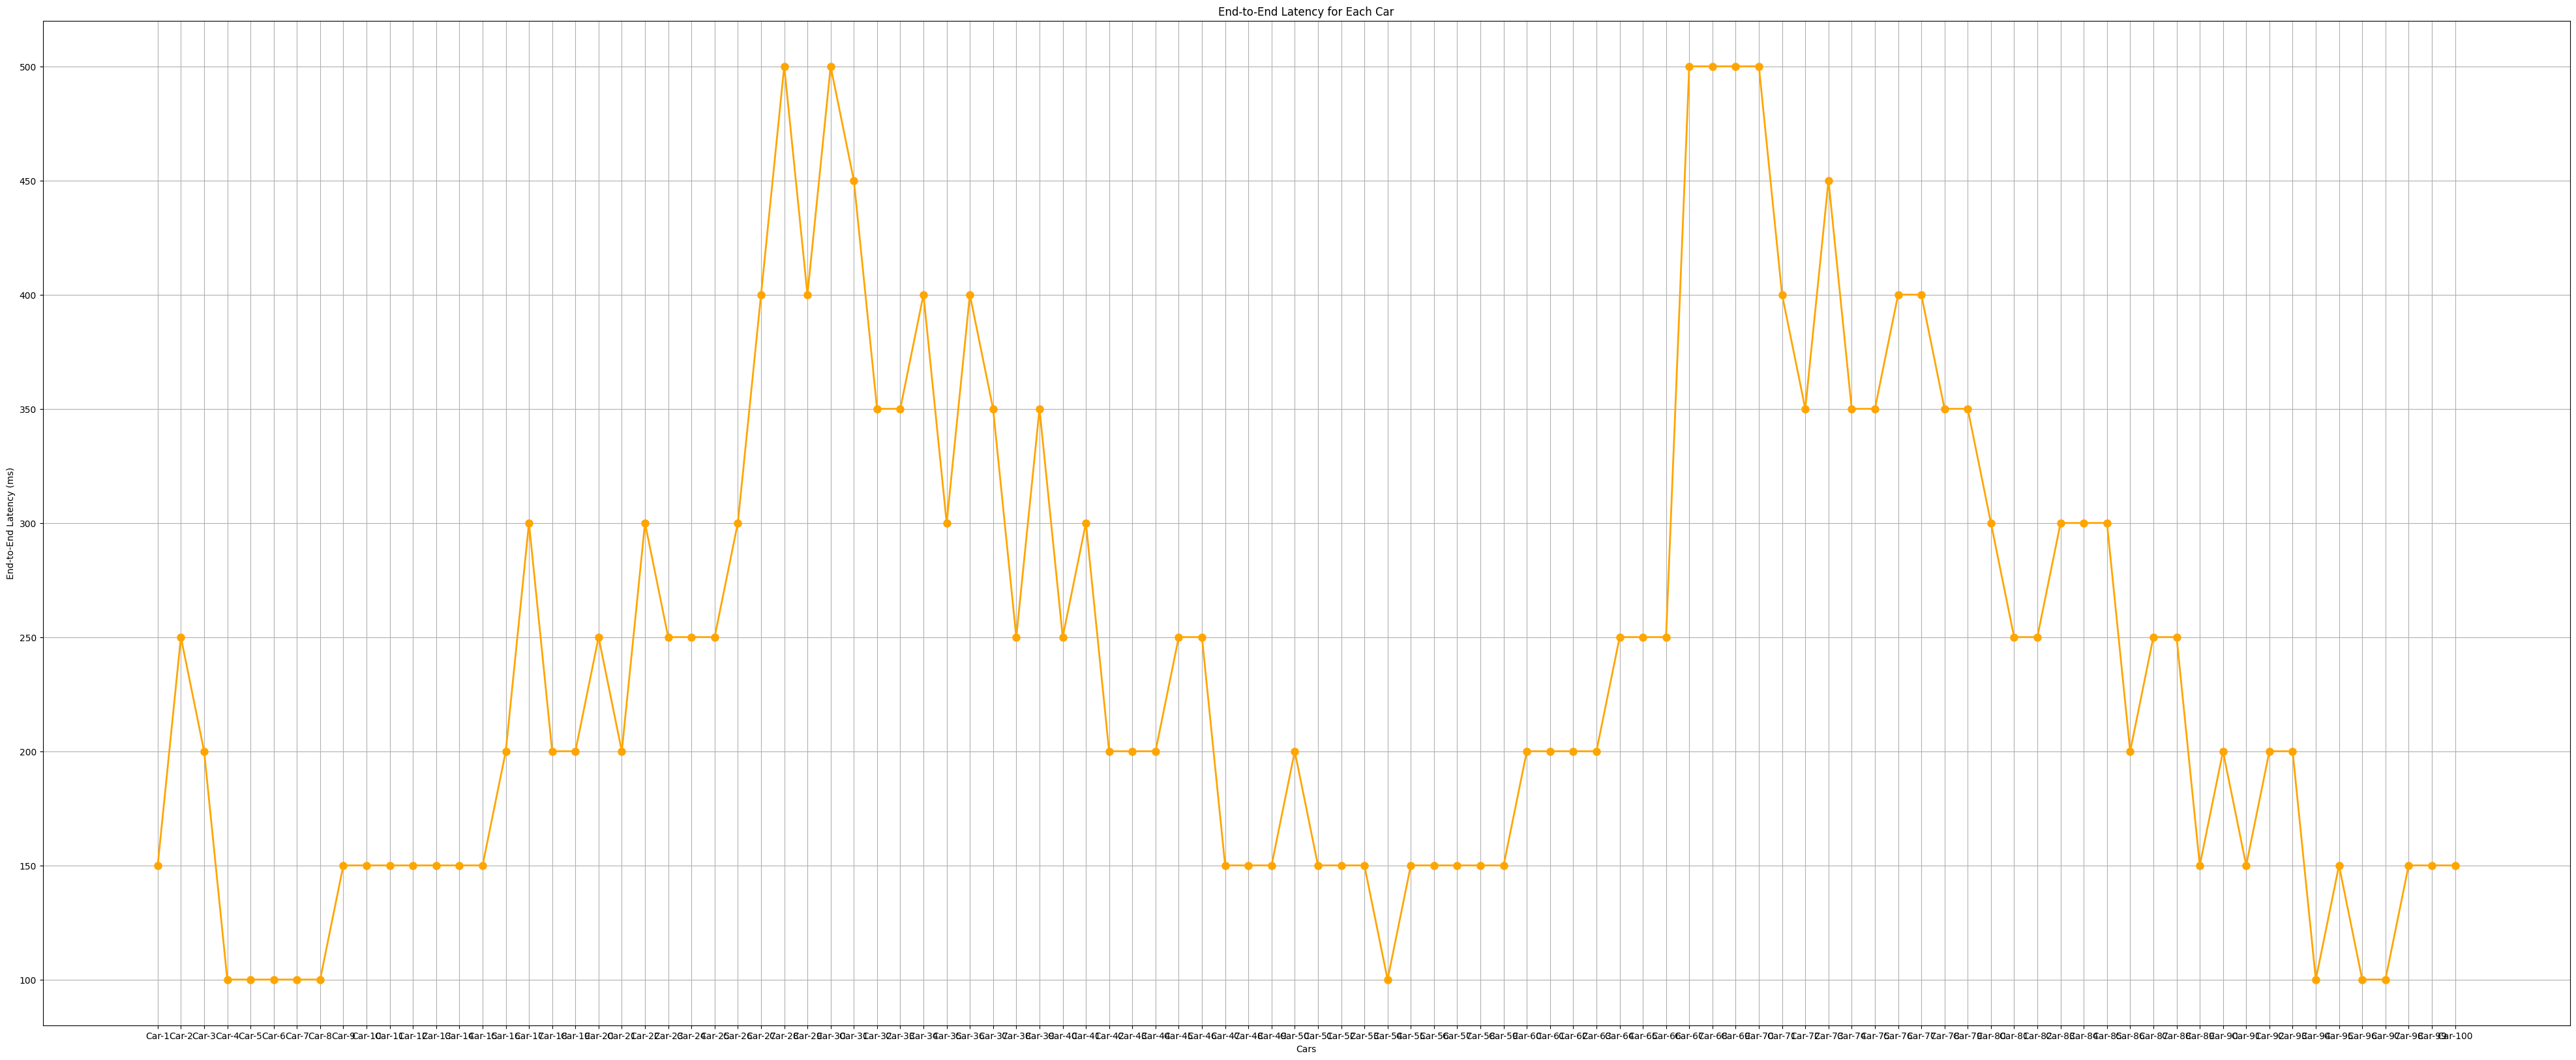

In [ ]:
# Plotting latency values of each car using a line plot
plt.figure(figsize=(50, 20))
plt.plot(cars, latency_values, marker='o', color='orange', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Cars')
plt.ylabel('End-to-End Latency (ms)')
plt.title('End-to-End Latency for Each Car')
plt.grid(True)
plt.show()

This plot illustrates the latency of car along with the path of each car to base stations.

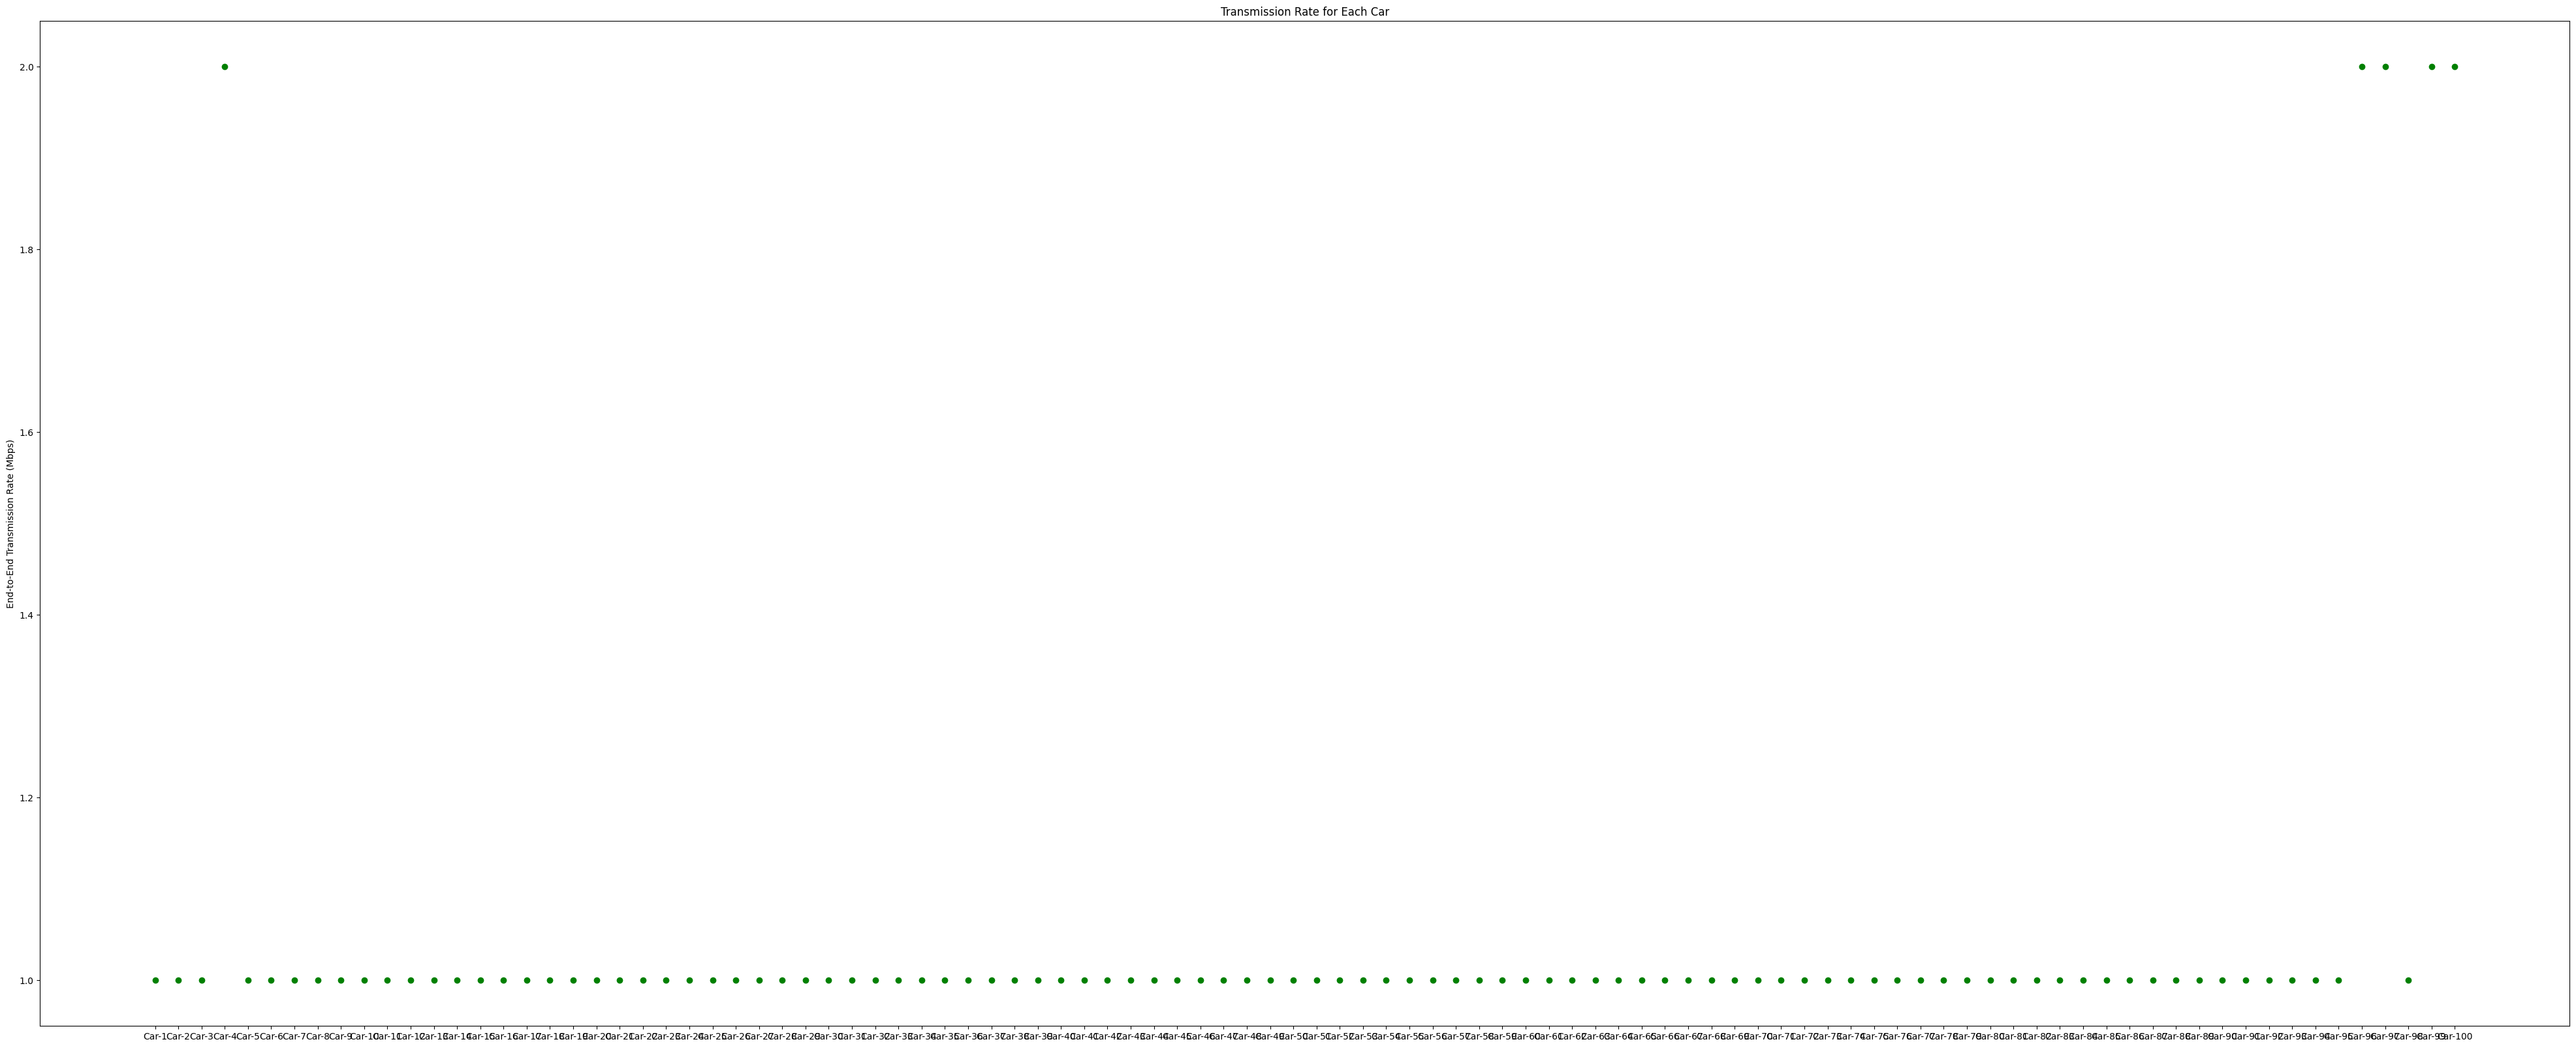

In [ ]:
#Plotting transmission rates of each car using scatter plot
plt.figure(figsize=(50, 20))
plt.scatter(cars,transmission_rates, color='green')
plt.ylabel('cars')
plt.ylabel('End-to-End Transmission Rate (Mbps)')
plt.title('Transmission Rate for Each Car')
plt.show()


The plot represents the calculated end-to-end transmission rates of path of each car to basestations.


1.   x-axis represents Cars
2.   Y-axis represents Transmission rates



#PARETO OPTIMIZATION TO CONVERT MULTI-OBJECTIVE OPTIMIZATION PROBLEMS TO SINGLE OBJECTIVE

Pareto Optimization or Multi-attribute decision making methods is the method of converting a multi-objective optimization problem to a single objective optimization problem.

**Relevance**: Many algorithms like Dijsktra, A* or Bellman-Ford find the shortest path by comparing the weight of the edges. The link with the lower value of weight is chosen in the algorithm. However, in real life scenario, optimization problems are rarely single-objective in nature. And adding the multiple objectives to certain algorithms might not be the most efficient approach. This is where we can apply any of the Pareto optimization methods to evaluate the objectives. By applying these, we can obtain a set of new weights to use in the algorithm. Some of the methods are Lexicographic method, Median Ranking method and Weighted Sum method.
[[9]](https://brightspace.bournemouth.ac.uk/d2l/le/lessons/342535/topics/1970104)

**Weighted-sum method(WSM)**: Also known as scalarization method, this approach combines the many objectives of a problem into a single-objective scalar function.  In this method first we categorize each attribute as either a Cost attribute or a Benefit attribute.

*Step 1*: Categorize attributes as Cost or Benefit attributes
A cost attribute, as the name suggests adds to the cost of the path. Hence, our requirement will be to minimize such attributes, that is *requirement = min(cost_attribute)*. A benefit attribute is where it has increased preference in relation to its increase in value. Hence the *requirement = max(benefit_attribute)*.

The two attributes are (i)end-to-end latency and (ii)end-to-end transmission rate. The objective is to maximize end-to-end transmission rate and minimize end-to-end latency. That is,

Objectives:

    Max (end-to-end transmission rate) --> benefit attribute
	Min (end-to-end latency)           --> cost attribute

*Step 2*: The linguistic terms are converted into a scale of 1-5 or 1-10

The weightage of each attribute are also considered. These will vary according to the optimization problem. The linguistic terms are converted into a scale of 1-5 or 1-10, 1 being the least desirable to 5 or 10 being the most.

*Step 3: Normalization*

Normalization is the process of converting all the attributes to the same scale. One can use any of the normalization methods for this purpose. Here. the Linear-scale transformation(LST) is used. The formula for normalizing using LST is:

    For cost attribute: (1/xij) divided by Sum(1/xij)
    For benefit attribute: xij divided by Sum(xij)
          where xij is the values of the corresponding attributes.
*Step 4: Calculate weights for each attribute*

When the weights are not given, we can calculate using any of the methods such as Analytic Hierarchy Process.
In this case, both attributes are given equal weightage, and we get the weights of each attribute as 0.5.

*Step 5: Calculate the global score or preference score*

The global score is essentially the new edge weights obtained after considering all the objectives. This is what can be used as alternative weights in the algorithms. The formula
    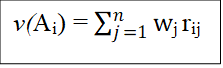

  where Ai is the alternative value,
	      wj is the weightage and
	      rij is the normalized value obtained previously is used.

These new obtained values are used as the weights of edges in the algorithm.
[[10]](https://www.youtube.com/watch?v=iAr4tGEYQZ0)

In [ ]:
'''Weighted Sum method for Pareto Optimization'''
dist=[]
new_dist=[]
new_lat=[]
''' We are using Linear-scale transformation method'''
'''Cost attribute Distance is Normalized using the formula distance[i] = (1/distance[i]) / Sum of all (1/distance[i])'''

#Calculate 1/distance[i]
i=0
while i < len(df):
    dist1 = 1/df.Distance[i]
    dist.append(dist1)
    i=i+1

sum_dist = sum(dist)
#Calculate the new distances and add to list new_dist
i=0
while i < len(dist):
    dist_val = dist[i]
    val1 = (dist_val)/(sum_dist)
    new_dist.append(val1)
    i=i+1

'''Cost attribute end-to-end latency is Normalized using the formula new_lat = (1/latency[i]) / Sum of all(1/latency[i])'''
'''Latency is 50 milliseconds for all links, so (1/latency) is 0.02'''
#Calculate sum of all (1/latency[i])
sum_lat = 0.02 * len(df)

#Calculate the new latency for all rows and add to list new_lat
i=0
while i < len(df):
    latency = 0.02
    val2 = (latency)/(sum_lat)
    new_lat.append(val2)
    i=i+1
'''Using Analytic Hierarchy Process, we get Weights for objectives Trans_rate and latency as 0.5, since they are categorized as equally important'''

'''Calculate Global or Preference Score for each Alternative'''
final_weights = []
i=0
while i < len(df):
    alt_dist = (0.5) * (new_dist[i])
    alt_lat = (0.5) * (new_lat[i])
    val3 = alt_dist + alt_lat
    final_weights.append(val3)
    i=i+1


# BELLMAN-FORD ALGORITHM (BFA)

A single-source shortest path approach that may be used for graphs with both positive and negative edge weights is the Bellman-Ford algorithm. Similar to Dijkstra's algorithm, the BFA also ensures that the shortest path in a graph is found.

The main difference between Dijsktra and Bellman Ford is that it is capable of handling graphs with negative edge weights, making it more versatile.

The Bellman Ford looks at the whole graph and not just the neighboring nodes.Initially distances are assumed to be infinite from the start node. Then it calculates the distances to each node which is referred to as "relaxation". For a graph with *V* number of vertices, the BellmanFord algorithm iterates |V|-1 number of times. This process of traversing the entire graph in each iteration makes it slower in comparison to Dijsktra. Although this also enables it to detect negative cycles. When there is a negative cycle present in the graph, one cannot find the shortest path. This is because when we continue to go around a negative cycle, the cost calculated will keep on decreasing, despite the actual distance being travelled increasing.[[11]](https://www.youtube.com/watch?v=lyw4FaxrwHg)


**Steps in the Bellman Ford Algorithm to find shortest path and detect negative cycle**:

*Step 1*:  Initialize a distance array to store shortest distance from source node to each node in the graph. The values are initialized as Infinity in this stage for all nodes except for the source node. Source node distance to itself will be 0.
The code provided in the lab for Dijsktra's Algorithm is adopted to accommodate the BFA. [[12]](https://brightspace.bournemouth.ac.uk/d2l/le/lessons/342535/topics/1963521)

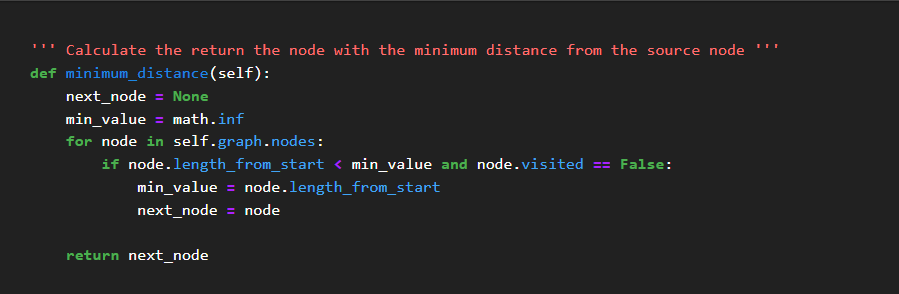

*Step 2*: Start relaxing the edges. The algorithm will compare weight/distance between each edge in the graph. If the new distance is less than previously stored one, its updated to the smaller value. While doing this, we can take note of the path traversed. This “relaxation” is repeated |V|-1 times, where V is the number of nodes.

*Step 3*: The final relaxation done is to check for negative cycle. If this final relaxation will change the values of distances, it will indicate the presence of a negative cycle in the graph.[[13]](https://www.geeksforgeeks.org/bellman-ford-algorithm-dp-23/).

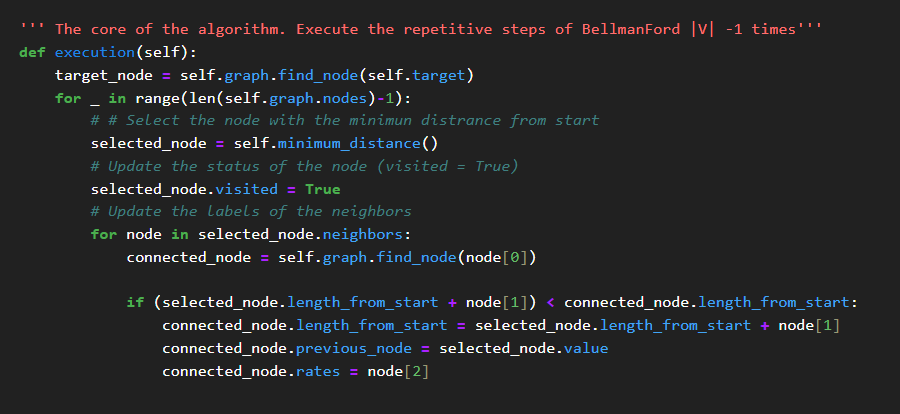

When implementing Bellman-Ford algorithm, similar to A-star or Dijsktra’s, the edge with the lower weight is chosen. One of our objectives is to maximize transmission rate. While considering transmission rates as edge weights, the path obtained will have the least possible end-to-end transmission rate which does not align with our objective. Hence, distances are considered as the edge weights for calculations, since it is inversely proportional to the transmission rate between the two nodes. *The thinking behind being the lesser the distance, the higher the transmission rate.* This is how the algorithm was tried out initially.

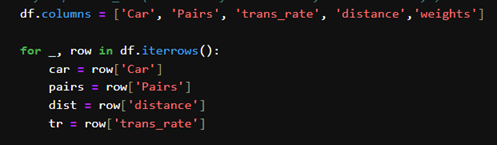

The two objectives are:

  Min (end-to-end latency) and

  Max (end-to-end transmission rate),
  which can also be written as Min(distance)

In the final code for Bellman-Ford algorithm, the alternate weights calculated previously with the weighted sum method for Multi-attribute decision making has been considered. This is the last column of the excel file, named weights.

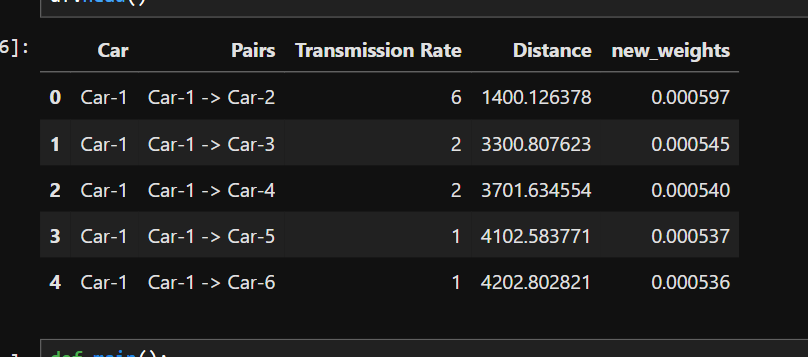

The algorithm chooses the links with lesser weights, fulfilling the 2 objectives.  

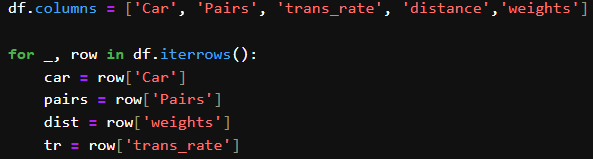

**Overview of data in which BFA is implemented**

Below is the overview of the data file. We can see the pairs column corresponding to each link in the graph. The Distance values, along with latency of 50 milliseconds is used to calculate the new_weights. The BFA takes these as the edge weights for calculating the shortest path. The corresponding transmission rates are tracked and retrieved for the output files.

In [ ]:
df = pd.read_csv('/content/maindataforallALGOs.csv', delimiter = ',')
df.head()

,Car,Pairs,Transmission Rate,Distance,new_weights
0,Car-1,Car-1 -> Car-2,6,1400.126378,0.000597
1,Car-1,Car-1 -> Car-3,2,3300.807623,0.000545
2,Car-1,Car-1 -> Car-4,2,3701.634554,0.000540
3,Car-1,Car-1 -> Car-5,1,4102.583771,0.000537
4,Car-1,Car-1 -> Car-6,1,4202.802821,0.000536


**Sample output generated from the Bellman-Ford Algorithm:**

- Source Node: 2, Path is: Car-2 -> BS-1, Rate: [6], End to end transmission rate: 6
- Source Node: 16, Path is: Car-16 -> Car-10 -> Car-5 -> BS-1, Rate: [2, 1, 1], End to end transmission rate: 1
- Source Node: 45, Path is: Car-45 -> Car-50 -> BS-2, Rate: [1, 1], End to end transmission rate: 1
- Source Node: 51, Path is: Car-51 -> BS-1, Rate: [10], End to end transmission rate: 10
- Source Node: 90, Path is: Car-90 -> Car-94 -> BS-2, Rate: [2, 1], End to end transmission rate: 1
- Source Node: 99, Path is: Car-99 -> BS-2, Rate: [10], End to end transmission rate: 10


**Lesson Learned after Implementation**

 The Bellman-Ford algorithm traverses the whole search space multiple times, thus guaranteeing a shortest path output. We can obtain the shortest path to all nodes in the graph from a particular source node using Bellman-Ford algorithm. After research and its implementation, we can analyze that for a problem such as this where we have a particular start and target node, an algorithm such as A-star might be more suitable. Since A-star considers both the edge weight and distance to the target, we might find the shortest path in lesser time. This is particularly helpful for larger search spaces. Bellman-Ford’s main attraction can be noted as the ability to identify the existence of negative cycle in the graph. Such a presence will imply that obtaining shortest paths is not possible. Hence, we can say that utilizing BFA for graphs with negative weights will increase the chances of finding optimized paths. Though it might take longer to execute BFA compared to DA or A-star, it is still faster than nature-inspired or genetic algorithms, where a significant number of generations yields better results.

In [ ]:
import pandas as pd
import numpy as np
import os
import math
import json
import time

class Node:

    def __init__(self, value, neighbors=None):
        self.value = value
        if neighbors is None:
            self.neighbors = []
        else:
            self.neighbors = neighbors

    ''' Return True if the vertex is connected with at least one vertex'''
    def has_neighbors(self):
        if len(self.neighbors) == 0:
            return False
        return True

    ''' Returns the number of vertices with which has a connection '''
    def number_of_neighbors(self):
        return len(self.neighbors)

    ''' Adds a new connection to the neighbour list'''
    def add_neighboor(self, neighboor):
        self.neighbors.append(neighboor)

    def __eq__(self, other):
        return self.value == other

    def __str__(self):
        returned_string = f"{self.value} -> "
        if self.has_neighbors():
            for neighboor in self.neighbors:
                returned_string += f"{neighboor[0].value} -> "

        returned_string += "None"
        return returned_string


class Graph:
    '''
        Graph class represents the graph data structure.
        It contains a nodes attribute (list) with all the nodes of the graph
    '''
    def __init__(self, nodes=None):
        if nodes is None:
            self.nodes = []
        else:
            self.nodes = nodes


    ''' Add a new node (vertex) in the grpah'''
    def add_node(self, node):
        self.nodes.append(node)


    '''Return True if the node with the given value exists. Otherwise it returns False'''
    def find_node(self, value):
        for node in self.nodes:
            if node.value == value:
                return node
        return None


    '''Add a new edge between two nodes, where distance is taken as the weight and transmission rate as trans'''
    def add_edge(self, value1, value2, weight, trans):
        node1 = self.find_node(value1)
        node2 = self.find_node(value2)

        if (node1 is not None) and (node2 is not None):
            node1.add_neighboor((node2, weight, trans))
            node2.add_neighboor((node1, weight, trans))
        else:
            print("Error: One or more nodes were not found")


    '''Return the number of nodes of the graph'''
    def number_of_nodes(self):
        return f"The graph has {len(self.nodes)} nodes"


    ''' Return True if the given nodes are connected. Otherwise return false'''
    def are_connected(self, node_one, node_two):
        node_one = self.find_node(node_one)
        node_two = self.find_node(node_two)

        for neighboor in node_one.neighbors:
            if neighboor[0].value == node_two.value:
                return True
        return False


    ''' Print the nodes '''
    def __str__(self):
        graph = ""
        for node in self.nodes:
            graph += f"{node.__str__()}\n"
        return graph


''' Vertex extends the class Node and represents each vertex in the graph'''
class Vertex(Node):
    def __init__(self, value, neighbors=None):
        super().__init__(value, neighbors)
        self.length_from_start = math.inf
        self.previous_node = None
        self.visited = False
        self.rates = None


    ''' Return the distance from a given neighbor'''
    def distance_from_neighbor(self, node):
        for neighbor in self.neighbors:
            if neighbor[0].value == node.value:
                return neighbor[1]
        return None


    def __str__(self):
       return f"{self.value} {self.length_from_start} {self.previous_node} {self.visited} {self.distance_from_neighbor} "

start_time_bell = time.time()

''' Represent the BellmanFord Algorithm '''
class BellmanFord_algorithm:
    def __init__(self, graph, start, target):
        self.graph = graph
        self.start = start
        self.target = target
        self.intialization()

    ''' Initialize the labels of each vertex '''
    def intialization(self):
        for node in self.graph.nodes:
            if node == self.start:            #distance of start node to itself is 0
                node.length_from_start = 0


    ''' Calculate the return the node with the minimum distance from the source node '''
    def minimum_distance(self):
        next_node = None
        min_value = math.inf
        for node in self.graph.nodes:
            if node.length_from_start < min_value and node.visited == False:
                min_value = node.length_from_start
                next_node = node

        return next_node


    ''' The core of the BellmanFord algorithm. '''
    def execution(self):
        target_node = self.graph.find_node(self.target)
        for _ in range(len(self.graph.nodes)-1):                   #Execute the repetitive steps of BellmanFord |V| -1 times, where V is the number of nodes in the graph
            # # Select the node with the minimun distrance from start
            selected_node = self.minimum_distance()
            # Update the status of the node (visited = True)
            selected_node.visited = True
            # Update the labels of the neighbors
            for node in selected_node.neighbors:
                connected_node = self.graph.find_node(node[0])

                if (selected_node.length_from_start + node[1]) < connected_node.length_from_start:
                    connected_node.length_from_start = selected_node.length_from_start + node[1]
                    connected_node.previous_node = selected_node.value
                    connected_node.rates = node[2]



        # Calculate the path from the source node to target node
        path = [target_node.value]
        rate = []

        while True:
            node = self.graph.find_node(path[-1])
            if node.previous_node is None:
                break
            path.append(node.previous_node)
            rate.append(node.rates)


        path.reverse()
        rate.reverse()
        return path, rate, target_node.length_from_start

       #The algorithm returns the path traversed to reach the destination, the transmission rate for each link, and the total distance

end_time_bell = time.time()

def main():

    vertices = []
    edges=[]
    opt_path = {}
    pathsForAll = []
    destination = ['BS-1','BS-2']
    df = pd.read_csv('/content/maindataforallALGOs.csv', delimiter = ',')
    df.columns = ['Car', 'Pairs', 'trans_rate', 'distance', 'weights']

    for _, row in df.iterrows():
        car = row['Car']
        pairs = row['Pairs']
        wt = row['weights']
        tr = row['trans_rate']

        pairs = pairs.replace('car-', '').replace('->', '').strip().split()

        for i in range(len(pairs) - 1):
            edge = (f"{pairs[i]}", f"{pairs[i+1]}", wt, tr)
            edges.append(edge)

    cars = df['Car'].apply(lambda x: f"{x}").unique().tolist()
    vertices = cars + ['BS-1','BS-2']

    for start_vertex in cars:
        for target_node in destination:
            graph = Graph()

            for vertex in vertices:
                graph.add_node(Vertex(vertex))

            for edge in edges:
                graph.add_edge(edge[0], edge[1], edge[2],edge[3])

            alg = BellmanFord_algorithm(graph, start_vertex, target_node)
            path, tr_rate, path_length = alg.execution()

            # Calculate total fitness
            total_fitness = 50 * (path_length)

            # Format the output
            car_id = start_vertex.split('-')[1]
            route_str = ' -> '.join(path)
            end_tr_rate = min(tr_rate)
            output_str = f"Car-{car_id},{tr_rate},{end_tr_rate}, {total_fitness}: {route_str}"

            # Store the best route
            if car_id not in opt_path or total_fitness < opt_path[car_id][3]:
                opt_path[car_id] = (route_str,end_tr_rate,tr_rate, total_fitness)


    print("Optimal paths:")
    for car_id, (route, tr_end,rate, total_fitness) in opt_path.items():
        out_dict = {
            "Source Node:":car_id,
            "Path is:":route,
            "Rate:":rate,
            "End to end transmission rate:":tr_end
        }
        pathsForAll.append(out_dict)
        print(out_dict)
    output_file_path = "paths_for_all_BF.json"
    with open(output_file_path, 'w') as json_file:
        json.dump(pathsForAll, json_file)

    print(f"All results saved to {output_file_path}")

# Calculate elapsed time
total_time_bell = end_time_bell - start_time_bell
print(f"Time taken for bell: {total_time_bell} seconds")

if __name__ == '__main__':
    main()

Time taken for bell: 0.00038504600524902344 seconds
Optimal paths:
{'Source Node:': '1', 'Path is:': 'Car-1 -> Car-8 -> BS-1', 'Rate:': [1, 1], 'End to end transmission rate:': 1}
{'Source Node:': '2', 'Path is:': 'Car-2 -> BS-1', 'Rate:': [6], 'End to end transmission rate:': 6}
{'Source Node:': '3', 'Path is:': 'Car-3 -> BS-1', 'Rate:': [2], 'End to end transmission rate:': 2}
{'Source Node:': '4', 'Path is:': 'Car-4 -> BS-1', 'Rate:': [2], 'End to end transmission rate:': 2}
{'Source Node:': '5', 'Path is:': 'Car-5 -> BS-1', 'Rate:': [1], 'End to end transmission rate:': 1}
{'Source Node:': '6', 'Path is:': 'Car-6 -> BS-1', 'Rate:': [1], 'End to end transmission rate:': 1}
{'Source Node:': '7', 'Path is:': 'Car-7 -> BS-1', 'Rate:': [1], 'End to end transmission rate:': 1}
{'Source Node:': '8', 'Path is:': 'Car-8 -> BS-1', 'Rate:': [1], 'End to end transmission rate:': 1}
{'Source Node:': '9', 'Path is:': 'Car-9 -> Car-3 -> BS-1', 'Rate:': [2, 2], 'End to end transmission rate:': 2}


## DIJKSTRA'S ALGORITHM (DA)



A graph concept method for figuring out the shortest route between two nodes in a weighted graph is the Dikjidtra Algorithm. The first node inside the procedure is about to zero and all next nodes are set to infinity. All nodes are then given approximate distance values. To maintain the record of all unvisited nodes, the first starting node of statistics must be present. If a shorter route is found during the second phase, the current node is again chosen, its neighbours are examined, and the approximate distances are updated. A node is marked after it has been visited. [[14]](https://www.youtube.com/watch?v=bZkzH5x0SKU)

In this aglorithm both the contraints are implemented as per the problem defination section and the best routes are displayed and is derived using both constraints.

* Part 1 : The edges are derived using distance and transmission rate data.

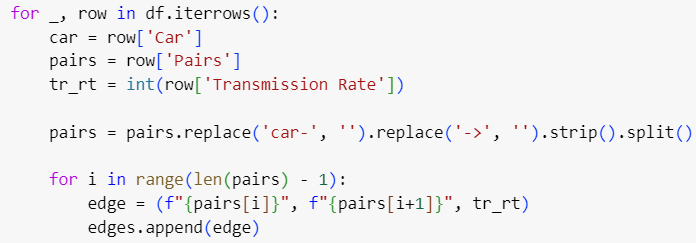

* Part 2 : The total fitness then considers latency and combines with Part1.


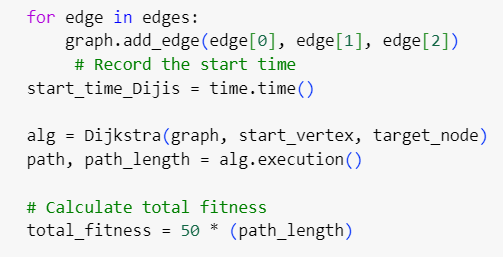

In [ ]:
class Node:
    '''
        The Node class represents each vertex of the graph
        The attribute value represents the stored data
        The list of neighbors attribute represents the vertices with which exists a connection
    '''
    def __init__(self, value, neighbors=None):
        self.value = value
        if neighbors is None:
            self.neighbors = []
        else:
            self.neighbors = neighbors

    ''' Return True if the vertex is connected with at least one vertex
    otherwiee returns false '''
    def has_neighbors(self):
        if len(self.neighbors) == 0:
            return False
        return True

    ''' Returns the number of vertices with which has a connection '''
    def number_of_neighbors(self):
        return len(self.neighbors)

    ''' Adds a new connection to the neighboor list'''
    def add_neighboor(self, neighboor):
        self.neighbors.append(neighboor)

    def __eq__(self, other):
        return self.value == other

    def __str__(self):
        returned_string = f"{self.value} -> "
        if self.has_neighbors():
            for neighboor in self.neighbors:
                returned_string += f"{neighboor[0].value} -> "

        returned_string += "None"
        return returned_string

In [ ]:
class Graph:
    '''
        Graph class represents the graph data structure.
        It contains a nodes attribute (list) with all the nodes of the graph
    '''
    def __init__(self, nodes=None):
        if nodes is None:
            self.nodes = []
        else:
            self.nodes = nodes


    ''' Ad a new node (vertex) in the grpah'''
    def add_node(self, node):
        self.nodes.append(node)


    '''Return True if the node with the given value exists. Otherwise it returns False'''
    def find_node(self, value):
        for node in self.nodes:
            if node.value == value:
                return node
        return None


    '''Add a new edge between two nodes'''
    def add_edge(self, value1, value2, weight=1):
        node1 = self.find_node(value1)
        node2 = self.find_node(value2)

        if (node1 is not None) and (node2 is not None):
            node1.add_neighboor((node2, weight))
            node2.add_neighboor((node1, weight))
        else:
            print("Error: One or more nodes were not found")


    '''Return the number of nodes of the graph'''
    def number_of_nodes(self):
        return f"The graph has {len(self.nodes)} nodes"


    ''' Return True if the given nodes are connected. Otherwise return false'''
    def are_connected(self, node_one, node_two):
        node_one = self.find_node(node_one)
        node_two = self.find_node(node_two)

        for neighboor in node_one.neighbors:
            if neighboor[0].value == node_two.value:
                return True
        return False


    ''' Print the nodes '''
    def __str__(self):
        graph = ""
        for node in self.nodes:
            graph += f"{node.__str__()}\n"
        return graph

In [ ]:
''' Vertex extends the class Node and represents each vertex in the graph'''
class Vertex(Node):
    def __init__(self, value, neighbors=None):
        super().__init__(value, neighbors)
        self.length_from_start = math.inf
        self.previous_node = None
        self.visited = False


    ''' Return the distance from a given neighbor'''
    def distance_from_neighbor(self, node):
        for neighbor in self.neighbors:
            if neighbor[0].value == node.value:
                return neighbor[1]
        return None

    def __str__(self):
       return f"{self.value} {self.length_from_start} {self.previous_node} {self.visited}"

In [ ]:
''' Represent the Dijkstra Algorithm '''
class Dijkstra:
    def __init__(self, graph, start, target):
        self.graph = graph
        self.start = start
        self.target = target
        self.intialization()

    ''' Initialize the labels of each vertex '''
    def intialization(self):
        for node in self.graph.nodes:
            if node == self.start:
                node.length_from_start = 0


    ''' Calculate the return the node with the minimum distance from the source node '''
    def minimum_distance(self):
        next_node = None
        min_value = math.inf
        for node in self.graph.nodes:
            if node.length_from_start < min_value and node.visited == False:
                min_value = node.length_from_start
                next_node = node

        return next_node


    ''' The core of the algorithm. Execute the repetitive steps of Dijkstra'''
    def execution(self):
        target_node = self.graph.find_node(self.target)
        visited =[]
        while not target_node.visited:
            # # Select the node with the minimun distrance from start
            selected_node = self.minimum_distance()
            # Update the status of the node (visited = True)
            selected_node.visited = True
            # Update the labels of the neighbors
            for node in selected_node.neighbors:
                connected_node = self.graph.find_node(node[0])

                if (selected_node.length_from_start + node[1]) < connected_node.length_from_start:
                    connected_node.length_from_start = selected_node.length_from_start + node[1]
                    connected_node.previous_node = selected_node.value

        # Calculate the path from the source node to target node
        path = [target_node.value]
        while True:
            node = self.graph.find_node(path[-1])
            if node.previous_node is None:
                break
            path.append(node.previous_node)

        path.reverse()
        return path, target_node.length_from_start

In [ ]:
import pandas as pd
import math
import time

# Record the start time
start_time_Dijis = time.time()

def main():
    file_path = '/content/maindataforallALGOs.csv'
    df = pd.read_csv(file_path, delimiter=',')
    print("Column Names:", df.columns)

    edges = []
    target_nodes = ['BS-1', 'BS-2']
    best_routes = {}


    for _, row in df.iterrows():
        car = row['Car']
        pairs = row['Pairs']
        tr_rt = int(row['Transmission Rate'])

        pairs = pairs.replace('car-', '').replace('->', '').strip().split()

        for i in range(len(pairs) - 1):
            edge = (f"{pairs[i]}", f"{pairs[i+1]}", tr_rt)
            edges.append(edge)

    car_values = df['Car'].apply(lambda x: f"{x}").unique().tolist()
    vertices = car_values + ['BS-1', 'BS-2']

    for start_vertex in car_values:
        for target_node in target_nodes:
            graph = Graph()

            for vertex in vertices:
                graph.add_node(Vertex(vertex))

            for edge in edges:
                graph.add_edge(edge[0], edge[1], edge[2])


            alg = Dijkstra(graph, start_vertex, target_node)
            path, path_length = alg.execution()

            # Calculate total fitness
            total_fitness = 50 * (path_length)

            # Format the output
            car_id = start_vertex.split('-')[1]
            route_str = ' -> '.join(path)
            output_str = f"Car-{car_id}, {total_fitness}: {route_str}"


            # Store the best route
            if car_id not in best_routes or total_fitness < best_routes[car_id][1]:
                best_routes[car_id] = (route_str, total_fitness)

    # Print the best routes
    print("\nBest Routes:")
    for car_id, (route, total_fitness) in best_routes.items():
        print(f"Car-{car_id}, {total_fitness}: {route}")
    # Record the end time
    end_time_Dijis = time.time()
    # Calculate and print the total time taken
    total_time_Dijis = end_time_Dijis- start_time_Dijis
    print(total_time_Dijis)

if __name__ == '__main__':
    main()


Column Names: Index(['Car', 'Pairs', 'Transmission Rate', 'Distance', 'new_weights'], dtype='object')

Best Routes:
Car-1, 100: Car-1 -> Car-5 -> BS-1
Car-2, 100: Car-2 -> Car-8 -> BS-1
Car-3, 100: Car-3 -> BS-1
Car-4, 100: Car-4 -> BS-1
Car-5, 50: Car-5 -> BS-1
Car-6, 50: Car-6 -> BS-1
Car-7, 50: Car-7 -> BS-1
Car-8, 50: Car-8 -> BS-1
Car-9, 150: Car-9 -> Car-2 -> Car-8 -> BS-1
Car-10, 100: Car-10 -> Car-5 -> BS-1
Car-11, 100: Car-11 -> Car-5 -> BS-1
Car-12, 100: Car-12 -> Car-5 -> BS-1
Car-13, 100: Car-13 -> Car-5 -> BS-1
Car-14, 100: Car-14 -> Car-5 -> BS-1
Car-15, 100: Car-15 -> Car-8 -> BS-1
Car-16, 200: Car-16 -> Car-56 -> Car-5 -> BS-1
Car-17, 150: Car-17 -> Car-10 -> Car-5 -> BS-1
Car-18, 150: Car-18 -> Car-10 -> Car-5 -> BS-1
Car-19, 150: Car-19 -> Car-11 -> Car-5 -> BS-1
Car-20, 150: Car-20 -> Car-15 -> Car-8 -> BS-1
Car-21, 150: Car-21 -> Car-59 -> Car-8 -> BS-1
Car-22, 200: Car-22 -> Car-17 -> Car-10 -> Car-5 -> BS-1
Car-23, 200: Car-23 -> Car-18 -> Car-10 -> Car-5 -> BS-1


# EVALUATION

Each of the algorithms implemented above has its merits and challenges. The efficiency of each is highly dependent on factors such as the objectives of the real world problem, or the size of the data set.

 *Genetic algorithm* is capable of providing optimization over a large search space. It is a robust algorithm that is able to deal with slight change in input or presence of noise and function without breaking. The time complexity of GA is generally expressed as O (N * M * G), where N is the population size, M is the chromosome length, and G is the number of generations. In our implementation, GA took approx. 2.41 minutes to execute, which is the  longest amongst the 4.

*Ant colony optimization* is successful I dealing with continuous optimization problems. The ACO has a time complexity of O(N^2) which is comparatively high making it less applicable for large scale problems. The ACO took the 2nd longest time, approx. 1.81 minutes to execute in our implementation.

The most common implementation of *Dijsktra’s algorithm* is the one where we find the shortest part from a particular source node to all the other nodes. This can however be adapted according to the problem at hand. DA has the time complexity of O(|V|^2) where V is the number of nodes. DA was the 2nd quickest among the 4 implemented taking only approx. 0.009 seconds for execution.

*Bellman-Ford Algorithm* can be seen an extension of DA, where it considers all of the graph in each iteration. This process enables the BFA to determine the presence of negative cycles in the graph. However, this also gives a higher time complexity of O(V*E) for the BFA. In our case, the BFA executed the quickest and in very similar time to DA, that is in 0.005 seconds.


We have taken a sample of 4 set of paths obtained for each algorithm. For consistency, we take a look at paths with start nodes as Car 41, Car 52, Car 77 and Car 89(chosen at random).


We can see that the paths obtained by GA were longer in many instances. Path from Car 41 had 9 links, which is 6 more than the smallest obtained by Dijsktra(3 links) and 5 and 4 more than paths obtained by Bellman-Ford and Ant Colony Optimization respectively. A similar case can be observed in the path from Car 77: Dijsktra once again returns the smallest path with 5 links, closely followed by ACO and Bellman-Ford with 6 links and GA with the longest(8 links). However we can see instances like with Car 52 where GA and BFA returns the direct link to BS-1 as the path where ACO and DA adds an additional link.

In general, we can observe that in most cases Dijsktra’s Algorithm returns the shortest path, closely followed by Bellman-Ford Algorithm. Ant colony optimization returns paths with end-to-end latency similar to DA and BFA, although smaller than obtained by Genetic Algorithm.


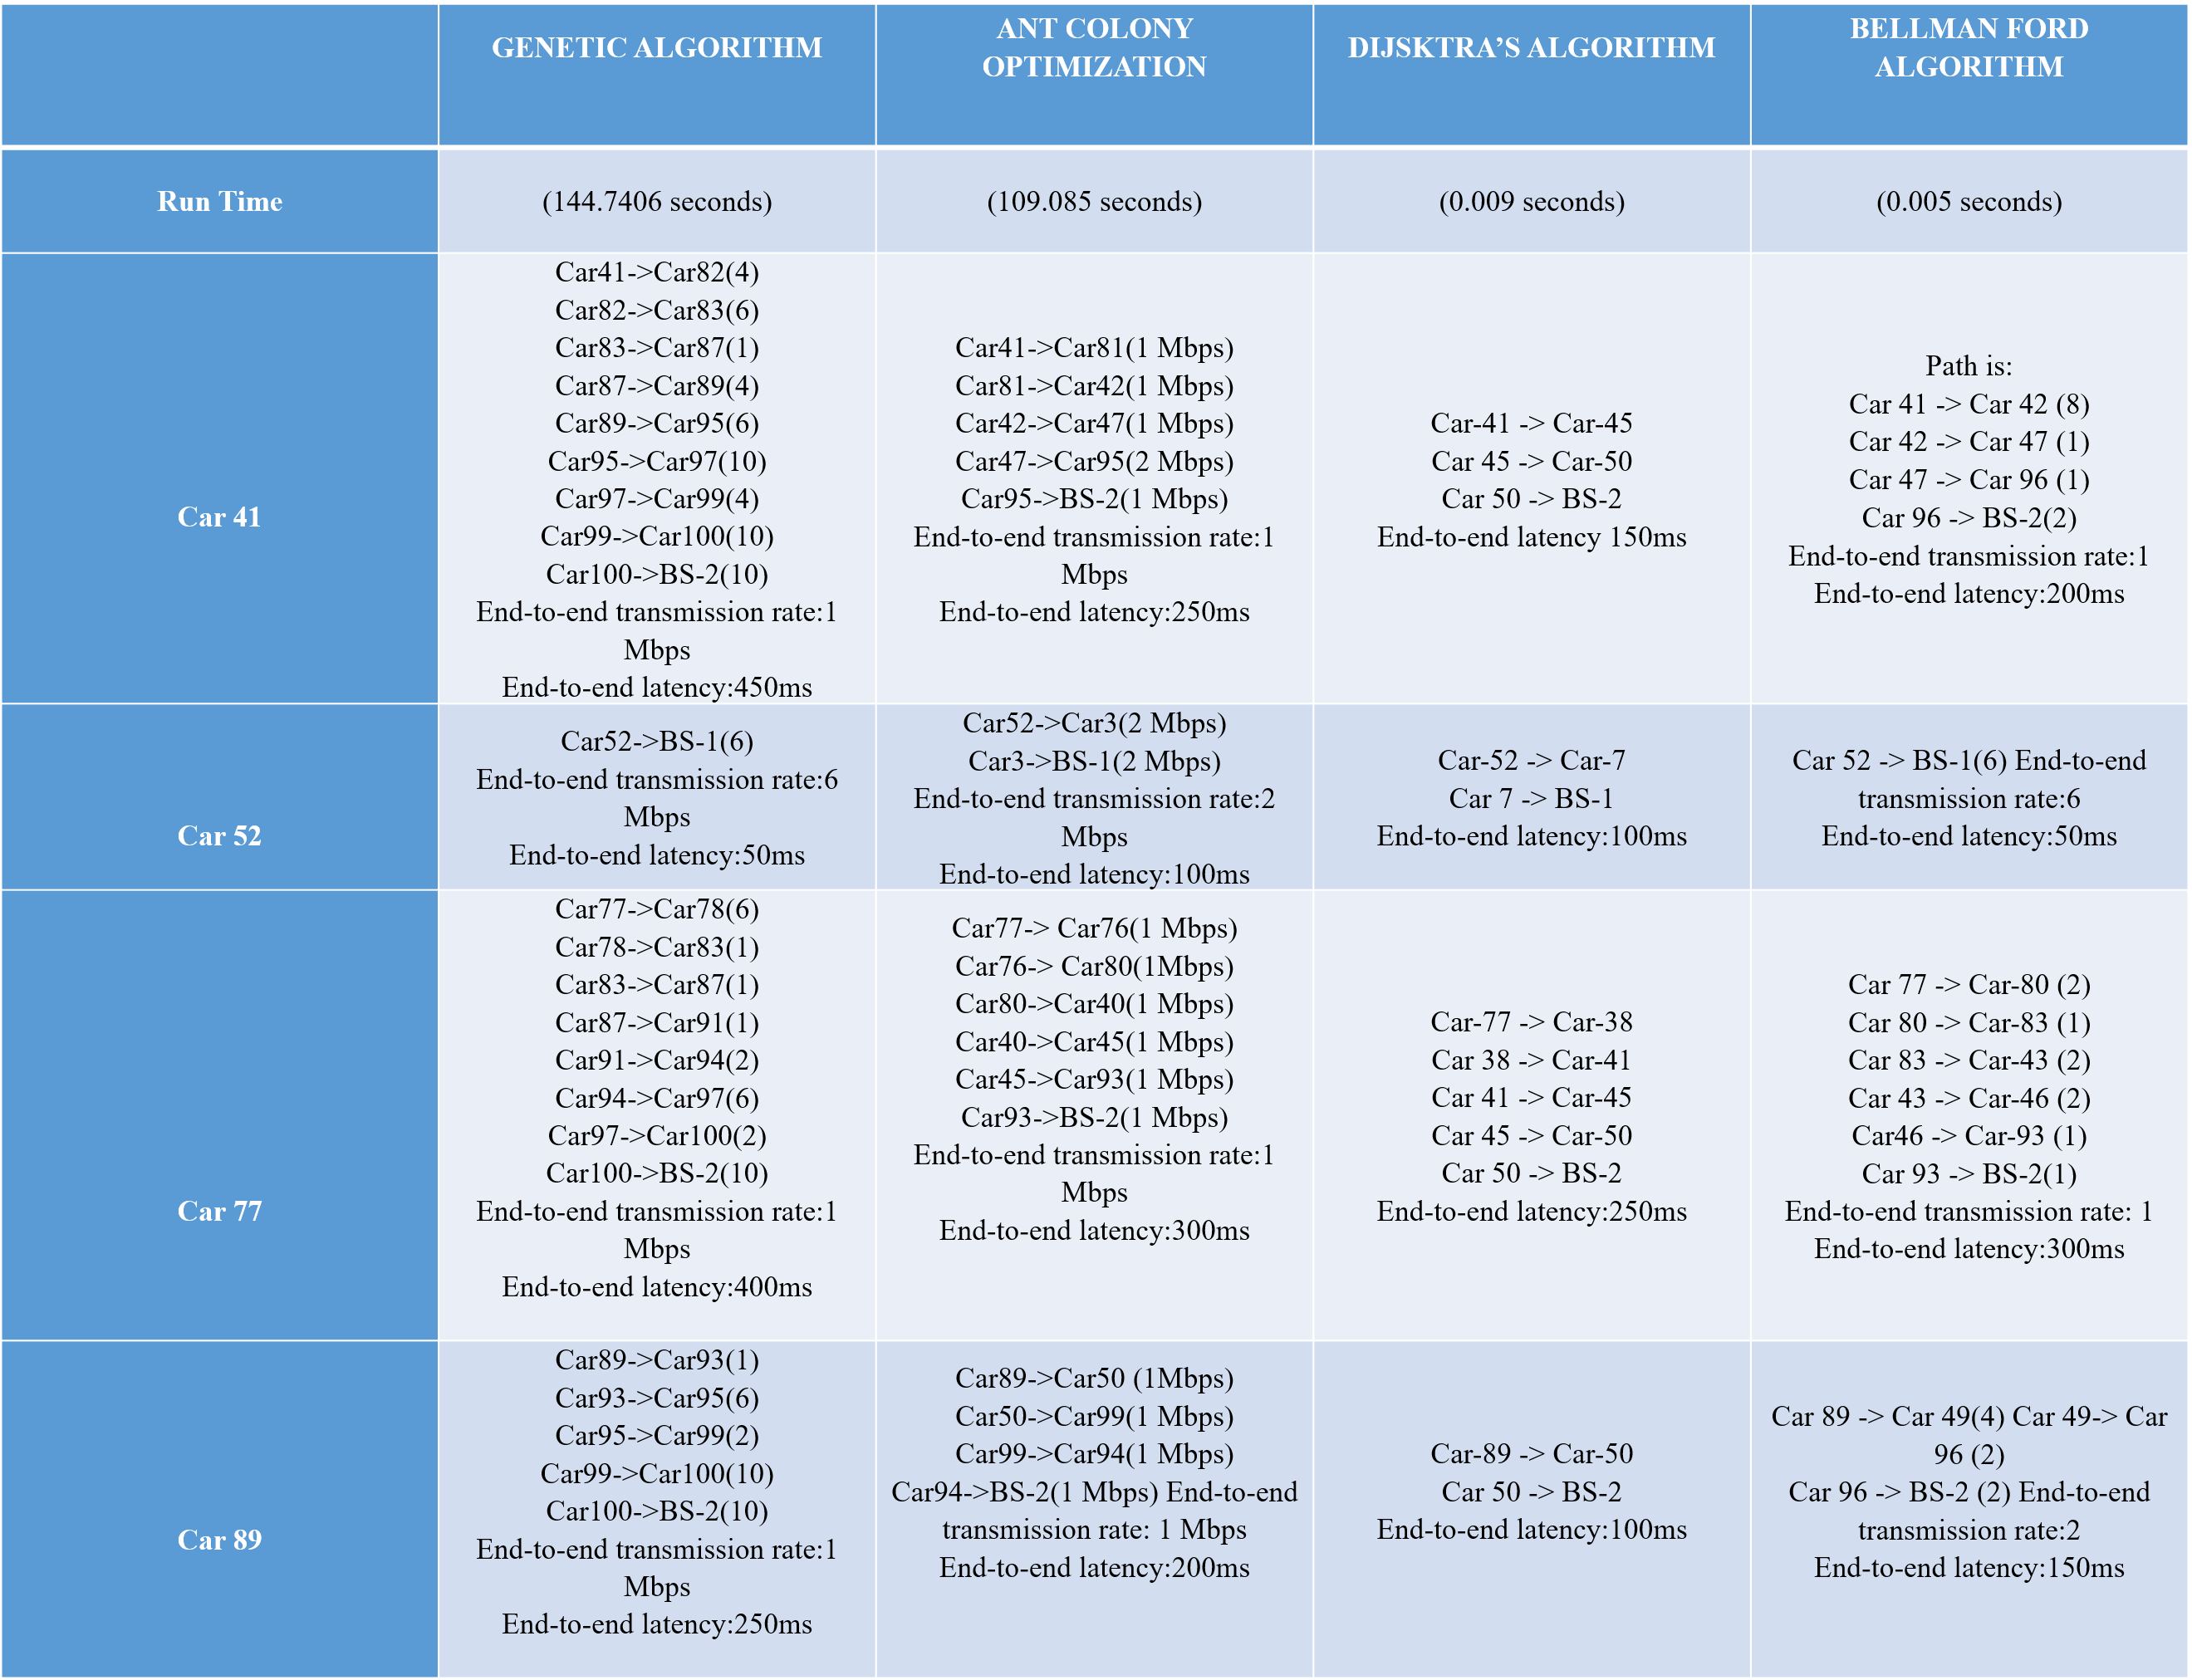

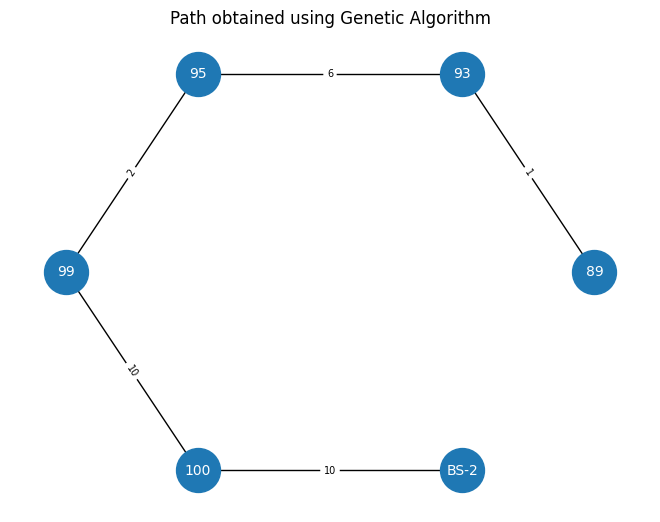

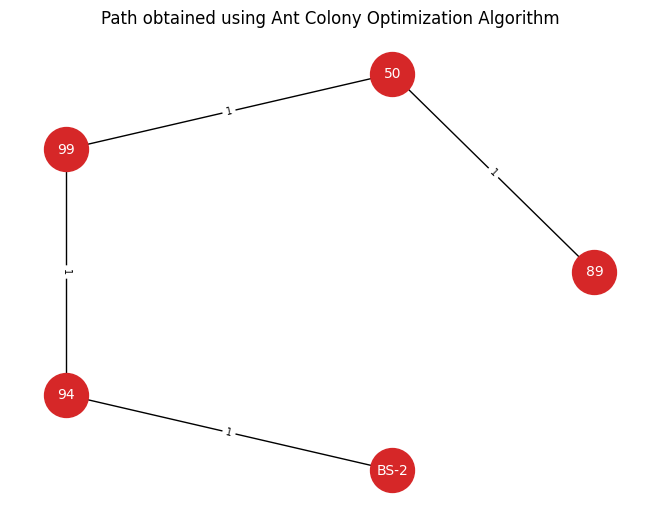

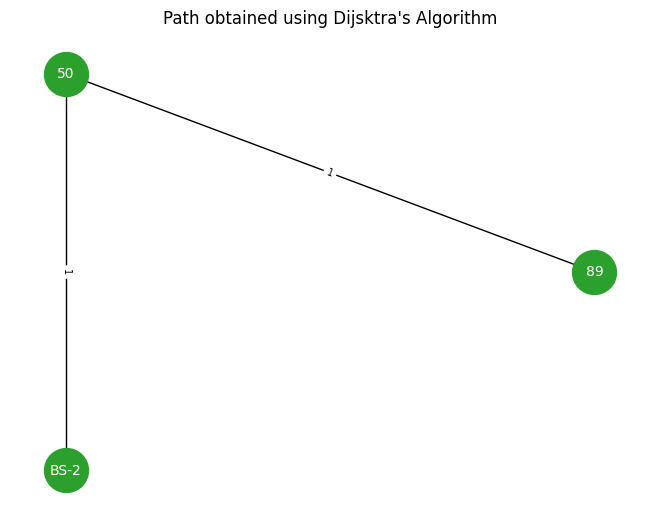

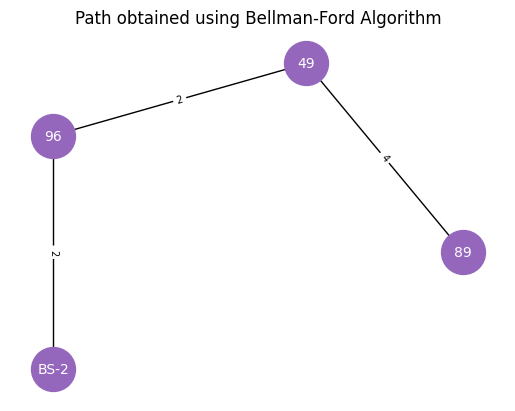

In [ ]:
'''Chart one sample path per algorithm for comparison'''
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()
g1=nx.Graph()
g2=nx.Graph()
g3=nx.Graph()

# Adding one node
g.add_node("1", label="Car", name="89")

# Adding multiple nodes
g.add_nodes_from(
    [
        ("2", {"label": "Car", "name": "93"}),
        ("3", {"label": "Car", "name": "95"}),
        ("4", {"label": "Car", "name": "99"}),
        ("5", {"label": "Car", "name": "100"}),
        ("6", {"label": "Car", "name": "BS-2"})
    ]
)

# Adding one edge
g.add_edge("1", "2", type="1")
g.add_edge("2", "3", type="6")
g.add_edge("3", "4", type="2")
g.add_edge("4", "5", type="10")
g.add_edge("5", "6", type="10")

pos = nx.circular_layout(g)
nx.draw(g, pos, node_size=1000)
labels = nx.get_node_attributes(g, "name")
edge_labels = nx.get_edge_attributes(g, "type")
plt.title("Path obtained using Genetic Algorithm")
nx.draw_networkx_labels(g, pos, labels=labels, font_size=10, font_color="white")
nx.draw_networkx_edge_labels(g, pos,edge_labels=edge_labels,  font_size=7)
plt.show()

g1.add_nodes_from(
    [
        ("1", {"label": "Car", "name": "89"}),
        ("2", {"label": "Car", "name": "50"}),
        ("3", {"label": "Car", "name": "99"}),
        ("4", {"label": "Car", "name": "94"}),
        ("5", {"label": "Car", "name": "BS-2"})
    ]
)
g1.add_edge("1", "2", type="1")
g1.add_edge("2", "3", type="1")
g1.add_edge("3", "4", type="1")
g1.add_edge("4", "5", type="1")
# Adding multiple edges
#g.add_edges_from([("2", "3"), ("3", "4"), ("4", "5"),("5", "6")])

# Graph drawing
pos = nx.circular_layout(g1)
nx.draw(g1, pos, node_size=1000, node_color="tab:red")

labels = nx.get_node_attributes(g1, "name")
edge_labels = nx.get_edge_attributes(g1, "type")
plt.title("Path obtained using Ant Colony Optimization Algorithm")
nx.draw_networkx_labels(g1, pos, labels=labels, font_size=10, font_color="white")
nx.draw_networkx_edge_labels(g1, pos,edge_labels=edge_labels,  font_size=7)

plt.show()

g2.add_nodes_from(
    [
        ("1", {"label": "Car", "name": "89"}),
        ("2", {"label": "Car", "name": "50"}),
        ("3", {"label": "Car", "name": "BS-2"})
    ]
)
g2.add_edge("1", "2", type="1")
g2.add_edge("2", "3", type="1")
# Adding multiple edges
#g.add_edges_from([("2", "3"), ("3", "4"), ("4", "5"),("5", "6")])

# Graph drawing
pos = nx.circular_layout(g2)
nx.draw(g2, pos, node_size=1000, node_color="tab:green")

labels = nx.get_node_attributes(g2, "name")
edge_labels = nx.get_edge_attributes(g2, "type")
plt.title("Path obtained using Dijsktra's Algorithm")
nx.draw_networkx_labels(g2, pos, labels=labels, font_size=10, font_color="white")
nx.draw_networkx_edge_labels(g2, pos,edge_labels=edge_labels,  font_size=7)

plt.show()

g3.add_nodes_from(
    [
        ("1", {"label": "Car", "name": "89"}),
        ("2", {"label": "Car", "name": "49"}),
        ("3", {"label": "Car", "name": "96"}),
        ("4", {"label": "Car", "name": "BS-2"})
    ]
)
g3.add_edge("1", "2", type="4")
g3.add_edge("2", "3", type="2")
g3.add_edge("3", "4", type="2")
# Adding multiple edges
#g.add_edges_from([("2", "3"), ("3", "4"), ("4", "5"),("5", "6")])

# Graph drawing
pos = nx.circular_layout(g1)
plt.title("Path obtained using Bellman-Ford Algorithm")
nx.draw(g3, pos, node_size=1000, node_color="tab:purple")

labels = nx.get_node_attributes(g3, "name")
edge_labels = nx.get_edge_attributes(g3, "type")

nx.draw_networkx_labels(g3, pos, labels=labels, font_size=10, font_color="white")
nx.draw_networkx_edge_labels(g3, pos,edge_labels=edge_labels,  font_size=7)

plt.show()

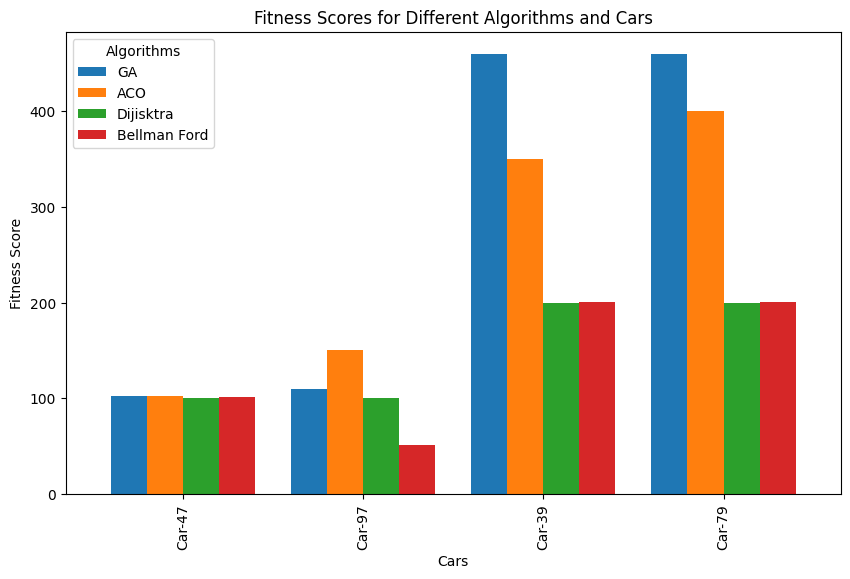

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'GA': [102, 110, 460, 460],
    'ACO': [102, 151, 350, 400],
    'Dijisktra': [100, 100, 200, 200],
    'Bellman Ford': [101, 51, 201, 201]
}

df = pd.DataFrame(data, index=['Car-47', 'Car-97', 'Car-39', 'Car-79'])

# Plotting the bar chart
df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Adding labels and title
plt.xlabel('Cars')
plt.ylabel('Fitness Score')
plt.title('Fitness Scores for Different Algorithms and Cars')
plt.legend(title='Algorithms')

# Display the plot
plt.show()


#COMPARATIVE ANALYSIS USING PLOT

In the above analysis, the determination of the shortest path for each car to the base station considered constraints such as transmission rate and latency. DA, ACO, GA, and the Bellman-Ford algorithm were employed for this purpose. When comparing the time taken by each algorithm, it became evident that Bellman-Ford required less time compared to the other three algorithms, with DA closely following. The results of this comparison indicate that natural-inspired algorithms, particularly ACO and GA, exhibit considerably longer execution times.
The extended execution time observed in natural-inspired algorithms, namely ACO and GA, may be attributed to the iterative nature of these algorithms. The iterative process involved in both ACO and GA might contribute to longer computational times.

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of elapsed times for different algorithms
elapsed_times = [total_time_Dijis, total_time_ACO, total_time_bell,total_time_GA]

# Labels for the algorithms
algorithm_labels = ["Djikstra", "ACO", "Bell_man","GA"]

# Create a bar plot for elapsed times
plt.bar(algorithm_labels, elapsed_times, color=['red', 'blue', 'orange','green'])

# Add text inside each bar showing the time in seconds
for i, time in enumerate(elapsed_times):
    plt.text(i, time, f"{time:.4f} seconds", ha='center', va='bottom')

# Set y-axis to linear scale
plt.yscale("linear")

plt.title("Elapsed Time Comparison for Different Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Time (seconds)")

plt.show()


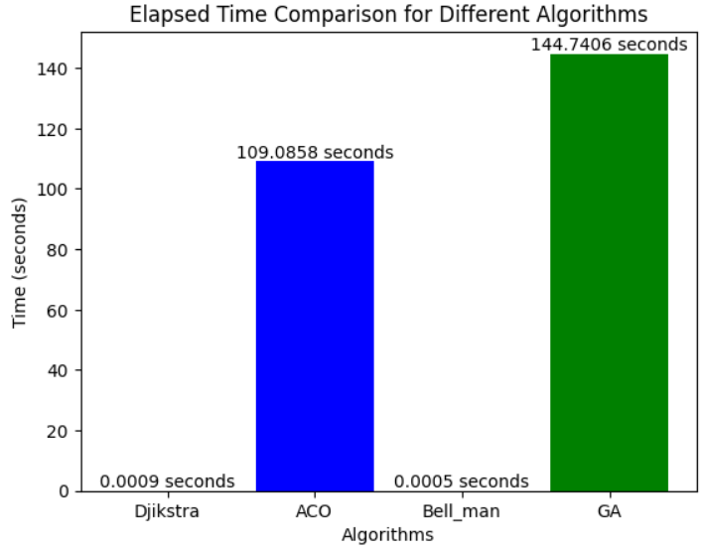

# CONCLUSION


In conclusion, the implemented study delves into the application of various optimization algorithms for routing optimization in vehicle networks on a motorway, focusing on two critical metrics: end-to-end transmission rate and end-to-end latency. The problem entails finding the optimal path for vehicles from their starting points to either of the two base stations, considering the challenges posed by real-world conditions, such as distance-based transmission rates. Each algorithm has been meticulously evaluated based on its efficiency, time complexity, and performance in the specific context of the motorway routing optimization. The comparative analysis of sample paths for specific starting nodes reinforces the observation that Dijkstra's Algorithm generally yields the shortest paths, followed closely by Bellman-Ford. Ant Colony Optimization performs competitively in terms of end-to-end latency, while Genetic Algorithm, despite its optimization power, tends to produce longer paths in many instances.
In essence, the study underscores the importance of selecting the most suitable algorithm based on the specific requirements and constraints of the real-world problem at hand. The trade-offs between optimization power, computational efficiency, and adaptability become evident, providing valuable insights for future applications of routing optimization in similar scenarios.

# FUTURE WORK

Real-world validation through field tests or simulations with actual motorway data could provide valuable insights into algorithm performance under dynamic conditions. Developing dynamic optimization strategies capable of adapting to real-time changes, coupled with the integration of machine learning for predicting traffic patterns, holds promise. Addressing scalability issues, exploring parallel or distributed computing approaches, and considering multi-objective optimization factors, such as energy efficiency and environmental impact, could further refine routing optimization algorithms. Additionally, personalized optimization strategies, security considerations, and a comprehensive cost-benefit analysis would contribute to the overall advancement of routing optimization solutions in the context of vehicular networks on motorways.


# ACKNOWLEDGEMENT

We are extremely thankful to the Bournemouth University Department of Computing and Informatics for providing us with this platform to present our group work. A special acknowledgement goes to Jiankang Zhang, Kevin Wilson, and Botao Fan for their kind support and insightful advice during the assessment. Their knowledge and assistance were quite helpful in determining how to proceed with our task. We also extend our sincere gratitude to our peers for their helpful and cooperative atmosphere. This assessment recognises how this potential for sharing knowledge and academic advancement has greatly enhanced every aspect of our learning.


# REFERENCES
[1] https://ieeexplore.ieee.org/abstract/document/4450627?casa_token=biC8Wszx0zkAAAAA:SYxgdvuOmwv6kpbogGIFSqS-f39AUo5zmMx95mCSnZScUlXX3eC437mjexqMQ1sZBdNE1j_A7w

[2] https://plos.figshare.com/articles/figure/_Flow_Chart_of_Genetic_Algorithm_with_all_steps_involved_from_beginning_until_termination_conditions_met_6_/1418786/1

[3] https://www.geeksforgeeks.org/genetic-algorithms/?ref=header_search

[4] https://medium.com/datasciencearth/genetic-algorithm-1-e52073005529

[5] Lecture and Lab

[6] https://www.geeksforgeeks.org/introduction-to-ant-colony-optimization/

[7] https://ieeexplore.ieee.org/document/4129846

[8] https://www.baeldung.com/wp-content/uploads/2017/03/ants1.png

[9] https://brightspace.bournemouth.ac.uk/d2l/le/lessons/342535/topics/1970104

[10] https://www.youtube.com/watch?v=iAr4tGEYQZ0

[11] https://www.youtube.com/watch?v=lyw4FaxrwHg

[12] https://brightspace.bournemouth.ac.uk/d2l/le/lessons/342535/topics/1963521

[13] https://www.geeksforgeeks.org/bellman-ford-algorithm-dp-23/


[14] https://www.youtube.com/watch?v=bZkzH5x0SKU